# Initialization

In [1]:
%cd ../covid_households
import recipes as recipes
import numpy as np

/Users/thayer/covid_households/covid_households


In [2]:
import pandas as pd
pd.set_option('mode.chained_assignment', 'raise')

In [3]:
rebuild = True
import utilities
import rebuild
if rebuild:
    s80_axis = np.linspace(0.10, 0.80, 36)
    p80_axis = np.linspace(0.10, 0.80, 36)
    sar_axis = np.linspace(0.05, 0.60, 56)
    axes_by_key = {'s80':s80_axis, 'p80':p80_axis, 'SAR':sar_axis}
    big_region = recipes.SimulationRegion(axes_by_key, utilities.S80_P80_SAR_Inputs)

    small_s80_axis = np.linspace(0.20, 0.80, 31)
    small_p80_axis = np.linspace(0.20, 0.80, 31)
    small_sar_axis = np.linspace(0.10, 0.60, 51)
    small_axes_by_key = {'s80':small_s80_axis, 'p80':small_p80_axis, 'SAR':small_sar_axis}
    small_region = recipes.SimulationRegion(small_axes_by_key, utilities.S80_P80_SAR_Inputs)

    results = rebuild.rebuild(rebuild.gillespie_completed_dirs, rebuild.gillespie_from_parts_dirs, '/Users/thayer/covid_households/new_parameters/gillespie-s80-p80-SAR', check_region=big_region)
    results = rebuild.rebuild(rebuild.tweaked_dprob_completed_dirs, rebuild.tweaked_dprob_from_parts_dirs, '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability', check_region=small_region)
else:
    #results = recipes.Results.load('/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability')
    results = recipes.Results.load('/Users/thayer/covid_households/new_parameters/gillespie-s80-p80-SAR')

Compiling results df from parts. Treating all files with extension .parquet as parts.
Compiling results df from parts. Treating all files with extension .parquet as parts.
Compiling results df from parts. Treating all files with extension .parquet as parts.


In [5]:
# extra results if we want to use extra simulated trials
extra_results = False
rebuild = False
if rebuild:
    from_parts_dirs = [
        '/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability/from-parts/experiment-05-10-00-58',
        '/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability/from-parts/experiment-05-10-00-59',
        '/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability/from-parts/experiment-05-11-00-59',
        '/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability/from-parts/experiment-05-11-01-47',
        '/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability/from-parts/experiment-05-12-02-21',
        '/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability/from-parts/experiment-05-12-02-24',
        '/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability/from-parts/experiment-05-13-14-50',
        '/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability/from-parts/experiment-05-15-02-11',
    ]

    completed_dirs = [
        '/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability/completed-results/experiment-05-13-14-50',
        '/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability/completed-results/experiment-05-16-16-11',
    ]
    r_objs = []
    for dir in from_parts_dirs:
        r = recipes.Results.load(dir, from_parts=True)
        r_objs.append(r)

    for dir in completed_dirs:
        r = recipes.Results.load(dir)
        r_objs.append(r)

    cumulative_r = None
    for r in r_objs:
        if cumulative_r is None:
            cumulative_r = r
        else:
            cumulative_r = cumulative_r.combine(r)
        #import pdb; pdb.set_trace()
        #for l in ['s80', 'p80', 'SAR']:
        #    print(l, np.unique(cumulative_r.df.index.get_level_values(l)))
        #print("NEXT\n")

    cumulative_r.save('/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability', filename='results')
    extra_results = cumulative_r

    s80_axis = np.linspace(0.20, 0.80, 31)
    p80_axis = np.linspace(0.20, 0.80, 31)
    sar_axis = np.linspace(0.10, 0.60, 51)
    axes_by_key = {'s80':s80_axis, 'p80':p80_axis, 'SAR':sar_axis}

    missing = extra_results.check_sizes_on_axes(axes_by_key, range(2,9))
    if missing:
        raise Exception('some sizes are missing from some points in parameter space. Check `missing` object')
else:
    extra_results = recipes.Results.load('/Users/thayer/covid_households/new_parameters/extra-s80-p80-SAR-sizes-2-8-tweaked-dprobability')

In [6]:
if extra_results:
    x = results.combine(extra_results)
    results = x

In [7]:
results.find_frequencies(inplace=True)

s80  p80  SAR  size  infections
0.2  0.2  0.1  2     1             0.945273
                     2             0.054727
               3     1             0.888033
                     2             0.092733
                     3             0.019233
                                     ...   
0.8  0.8  0.6  8     4             0.000053
                     5             0.000033
                     6             0.000433
                     7             0.009287
                     8             0.983347
Name: count, Length: 1715385, dtype: float64

# Violin figures

`null_freqs` represents the frequencies we observe in the absence of heterogeneity. We use it to calculate the MLE along the restriction where heterogeneity is not present.

In [8]:
freq = results.df['frequency']
s80_l = freq.index.get_level_values(0)
p80_l = freq.index.get_level_values(1)

null_freqs = freq[(s80_l == 0.8) & (p80_l == 0.8)]
null_freqs

s80  p80  SAR  size  infections
0.8  0.8  0.1  2     1             0.899220
                     2             0.100780
               3     1             0.808853
                     2             0.161253
                     3             0.029893
                                     ...   
          0.6  8     4             0.000053
                     5             0.000033
                     6             0.000433
                     7             0.009287
                     8             0.983347
Name: frequency, Length: 1785, dtype: float64

In [9]:
def make_mles(logl, population, parameter_set, population_name=None):
    """Takes the log likelihood surface for each configuration and returns the MLEs (one for each trial).

    Args:
        logl (Pandas.DataFrame): the loglikelihood surface. Indexed by at least `trial` which represent different observations
        population (dict): a dictionary of household size --> number of households.
        parameter_set (tuple): the value of each parameter that in fact produced the simulated data

    Returns:
        Pandas.DataFrame: a dataframe of MLE values with one column for each parameter inferred
    """
    fits = logl.groupby('trial').idxmax()
    fits = pd.DataFrame(fits.tolist())
    new_names = []
    for name in logl.index.names:
        name = name if name == 'trial' else 'MLE_' + name
        new_names.append(name)
    fits.columns = new_names
    fits.set_index('trial')

    fits['sample size'] = sum([k*v for k,v in population.items()])
    if population_name is not None:
        fits['population mix'] = population_name
    else:
        fits['population mix'] = [tuple(population.keys()) for i in range(len(fits))]
    fits ['parameters'] = [parameter_set] * len(fits)
    return fits

Choose the different combinations of parameters / sample sizes / household sizes to try.

In [20]:
%cd /Users/thayer/covid_households/covid_households
import likelihood
sample_sizes = [1000, 5000, 15000]#, 5000, 10000]
#parameter_sets = [(0.5, 0.5, 0.25), (0.3, 0.3, 0.25), (0.8, 0.4, 0.25), (0.4, 0.8, 0.25), (0.5, 0.5, 0.35), (0.3, 0.3, 0.35), (0.8, 0.4, 0.35), (0.4, 0.8, 0.35)]
parameter_sets = [(0.5, 0.5, 0.35), (0.3, 0.3, 0.35), (0.8, 0.4, 0.35), (0.4, 0.8, 0.35)]

#   Two  | Three	 Four     Five    Six    Seven or more
# 2021
# 45,515 | 19,523 | 16,098 | 7,577 | 2,635 |     1,611
# https://www.census.gov/data/tables/time-series/demo/families/households.html
# Let's take households of size > 2 and assume that 'seven or more' --> equal mix of 7 and 8
American_households_size_ge_3 = (19523 + 16098 + 7577 + 2635 + 1611)
America_total = {3:19523, 4:16098, 5:7577, 6:2635, 7:1611//2, 8:1611//2}
America_households_total = np.sum([v for v in America_total.values()])
named_populations = {'America_census':{k:v/America_households_total for k,v in America_total.items()}}
population_descriptions = {'America_census': 'divided in proportion to American households of size >=3'}


# UN data: https://www.un.org/development/desa/pd/data/household-size-and-composition

# A few other countries
# Percent 1 | 2-3 | 4-5 | 6+
# Philippines [2017] (average size = 4.23)
# 9.18	30.05	36.82	23.95
philippines_percents = [9.18, 30.05, 36.82, 23.95]
# Guatemala [2015] (average size = 5.23)
# 4.33	26.57	37.51	31.60
guatemala_percents = [4.33, 26.57, 37.51, 31.60]
guatemala_average = 5.23
# US [2015] (average size = 2.49)
# 27.89	49.49	18.81	3.81
us_percents = [27.89, 49.49, 18.81, 3.81]
# Mexico [2015] (Average size 3.74)
# 10.08	37.68	37.75	14.49
mexico_percents = [10.08, 37.68, 37.75, 14.49]

percent_buckets_left_side = [1, 2, 4, 6]
percent_buckets_right_side = [1, 3, 5, 9]

# Let's be dumb about it and just assume that you are evenly mixed within the bucket and that 6+ goes from 6-8.
# Don't anchor to the average, just calculate the residual

buckets = [(1,1), (2,3), (4,5), (6,8)]
def uniform_buckets(percents, left_cutoff=None):
    np_population = np.zeros(10)
    for i,bucket in enumerate(buckets):
        left, right = bucket
        average_percent = percents[i] / (right - left + 1)
        for size in range(left, right+1):
            np_population[size] = average_percent
    if left_cutoff is not None:
        np_population[:left_cutoff] = 0
        remaining_percent = np.sum(np_population)
        np_population = np_population * 100 / (remaining_percent)
    population = {}
    for size, percent in enumerate(np_population):
        if percent == 0:
            continue
        population[size] = percent/100
    return population

named_populations.update({
    'America_UN':uniform_buckets(us_percents, left_cutoff=3),
    'Mexico':uniform_buckets(mexico_percents, left_cutoff=3),
    'Philippines':uniform_buckets(philippines_percents, left_cutoff=3),
    'Guatemala':uniform_buckets(guatemala_percents, left_cutoff=3),
})

population_descriptions.update({
    'America_UN':'US households size >= 3 estimated from UN',
    'Mexico':'Mexican households size >= 3 estimated from UN',
    'Philippines':'Philippine households size >= 3 estimated from UN',
    'Guatemala':'Guatemalan households size >= 3 estimated from UN'
})

#population_mixes = [(8,), (4,5,6,7,8), 'America']
#population_mixes = [(4,5,6,7,8), 'America_UN', 'Mexico', 'Philippines', 'Guatemala']
population_mixes = [(8,), (4,), 'America_census', 'Guatemala']

/Users/thayer/covid_households/covid_households


Run the fits at all the combinations (create the population sample using statistical resampling — not forward simulation). Aggregate fits against the full surface in `fits_dfs` and the fits on the restriction that there is no heterogeneity in `null_hypoth_fits_dfs`.

In [21]:
trials = 300

# a hypothesis is a theory about which parameters are involved. fits will be done separately for each hypothesis
hypotheses = {
    'all': ['s80', 'p80', 'SAR'],
    'SAR and infectivity vary': ['p80', 'SAR'],
    #'SAR and susceptibility vary': ['s80', 'SAR'],
    'null hypothesis': ['SAR'],
}

def restrict_parameters(base_results, included_parameters):
    freqs = base_results.df['frequency'].copy()

    for parameter in set(base_results.metadata.parameters) - set(included_parameters):
        if parameter not in ['s80', 'p80']:
            raise ValueError("can't exclude SAR as it has no default hypothesis.")
        parameter_level = freqs.index.get_level_values(base_results.metadata.parameters.index(parameter))
        freqs = freqs[(parameter_level == 0.8)]

    return freqs


frequencies_by_hypothesis = {k: restrict_parameters(results, included_parameters) for k,included_parameters in hypotheses.items()}
from collections import defaultdict
fit_collections = defaultdict(list)

for sample_size in sample_sizes:
    for population_mix in population_mixes:
        population_name = None
        if isinstance(population_mix, str):
            population_name = population_mix
            population = named_populations[population_mix]
            population = {k:int(np.round((v * sample_size)//k)) for k,v in population.items()}
            print(population)
        else:
            population_per_size = sample_size // len(population_mix)
            population = {s:population_per_size//s for s in population_mix}
            print(population)
        for parameter_set in parameter_sets:
            print(parameter_set, population)
            samples = results.resample(parameter_set, population, trials=trials)
            for hypothesis_name, hypothesis_frequencies in frequencies_by_hypothesis.items():
                logl = likelihood.logl_from_frequencies_and_counts(hypothesis_frequencies, samples['count'], results.metadata.parameters)
                fits = make_mles(logl, population, parameter_set, population_name=population_name)

                normalized_probability = logl.groupby('trial').apply(lambda g: likelihood.normalize_probability(g))
                confidence_masks = normalized_probability.groupby('trial').apply(lambda g: likelihood.find_confidence_mask(g)).astype('bool')
                confidence_grouped = confidence_masks.groupby('trial')
                p80_confidence_intervals = confidence_grouped.apply(lambda g: likelihood.confidence_interval_from_confidence_mask(g, 'p80', include_endpoints=True))
                s80_confidence_intervals = confidence_grouped.apply(lambda g: likelihood.confidence_interval_from_confidence_mask(g, 's80', include_endpoints=True))
                SAR_confidence_intervals = confidence_grouped.apply(lambda g: likelihood.confidence_interval_from_confidence_mask(g, 'SAR', include_endpoints=True))

                fits['p80_interval'] = (p80_confidence_intervals)
                fits['s80_interval'] = (s80_confidence_intervals)
                fits['SAR_interval'] = (SAR_confidence_intervals)
                fits['written sample size'] = sample_size
                fit_collections[hypothesis_name].append(fits)


{8: 125}
(0.5, 0.5, 0.35) {8: 125}
(0.3, 0.3, 0.35) {8: 125}
(0.8, 0.4, 0.35) {8: 125}
(0.4, 0.8, 0.35) {8: 125}
{4: 250}
(0.5, 0.5, 0.35) {4: 250}
(0.3, 0.3, 0.35) {4: 250}
(0.8, 0.4, 0.35) {4: 250}
(0.4, 0.8, 0.35) {4: 250}
{3: 137, 4: 84, 5: 31, 6: 9, 7: 2, 8: 2}
(0.5, 0.5, 0.35) {3: 137, 4: 84, 5: 31, 6: 9, 7: 2, 8: 2}
(0.3, 0.3, 0.35) {3: 137, 4: 84, 5: 31, 6: 9, 7: 2, 8: 2}
(0.8, 0.4, 0.35) {3: 137, 4: 84, 5: 31, 6: 9, 7: 2, 8: 2}
(0.4, 0.8, 0.35) {3: 137, 4: 84, 5: 31, 6: 9, 7: 2, 8: 2}
{3: 53, 4: 56, 5: 45, 6: 21, 7: 18, 8: 15}
(0.5, 0.5, 0.35) {3: 53, 4: 56, 5: 45, 6: 21, 7: 18, 8: 15}
(0.3, 0.3, 0.35) {3: 53, 4: 56, 5: 45, 6: 21, 7: 18, 8: 15}
(0.8, 0.4, 0.35) {3: 53, 4: 56, 5: 45, 6: 21, 7: 18, 8: 15}
(0.4, 0.8, 0.35) {3: 53, 4: 56, 5: 45, 6: 21, 7: 18, 8: 15}
{8: 625}
(0.5, 0.5, 0.35) {8: 625}
(0.3, 0.3, 0.35) {8: 625}
(0.8, 0.4, 0.35) {8: 625}
(0.4, 0.8, 0.35) {8: 625}
{4: 1250}
(0.5, 0.5, 0.35) {4: 1250}
(0.3, 0.3, 0.35) {4: 1250}
(0.8, 0.4, 0.35) {4: 1250}
(0.4, 0.8, 0.3

Combine results into single dfs.

In [23]:
fits = {} 
for hypothesis_name, fit_dfs in fit_collections.items():
    fit_df = pd.concat(fit_dfs)
    fits[hypothesis_name] = fit_df
    
null_fit_df = fits['null hypothesis']
fit_df = fits['all']
#fit_df = fits['SAR and infectivity vary']

The cell below will plot violins for each parameter over a single population.

/var/folders/9w/8b0b4bqn1vv4gl40h13fzdr40000gn/T/ipykernel_12087/2510322938.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

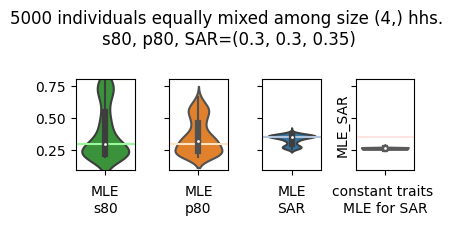

<Figure size 432x288 with 0 Axes>

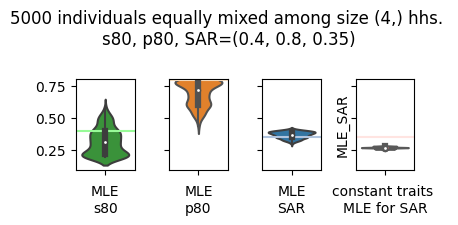

<Figure size 432x288 with 0 Axes>

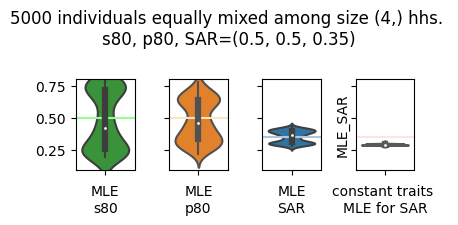

<Figure size 432x288 with 0 Axes>

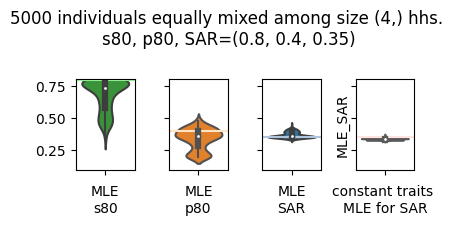

<Figure size 432x288 with 0 Axes>

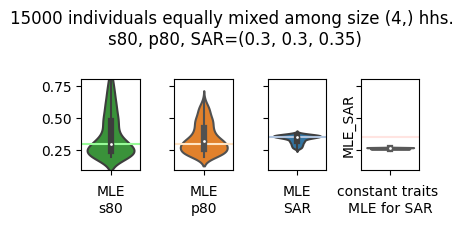

<Figure size 432x288 with 0 Axes>

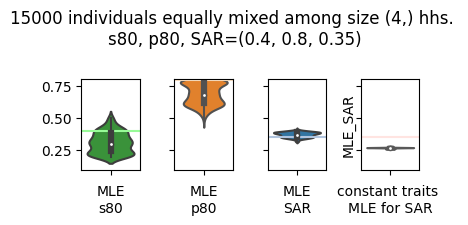

<Figure size 432x288 with 0 Axes>

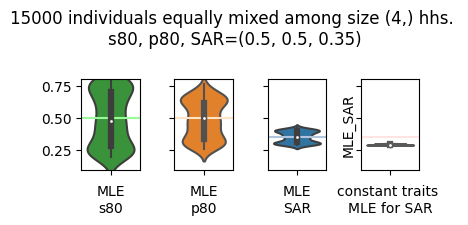

<Figure size 432x288 with 0 Axes>

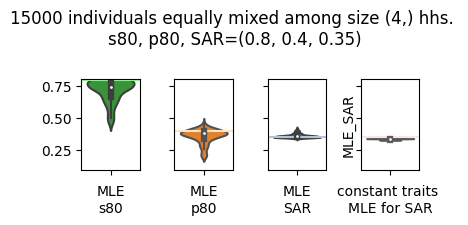

<Figure size 432x288 with 0 Axes>

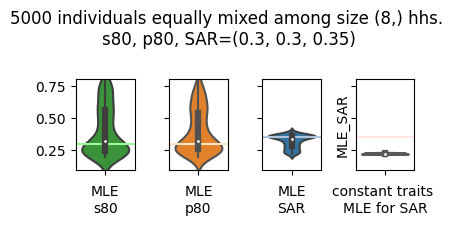

<Figure size 432x288 with 0 Axes>

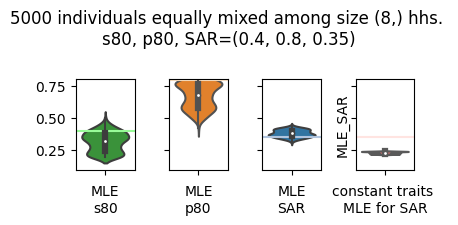

<Figure size 432x288 with 0 Axes>

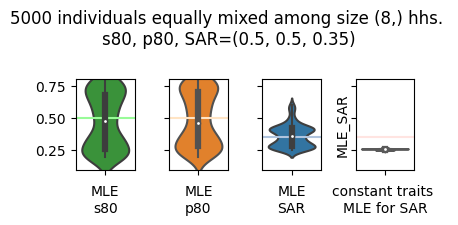

<Figure size 432x288 with 0 Axes>

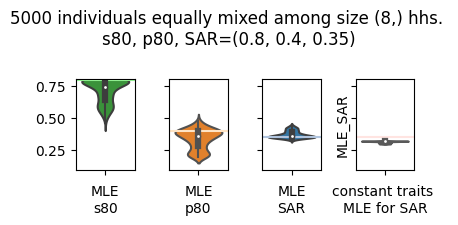

<Figure size 432x288 with 0 Axes>

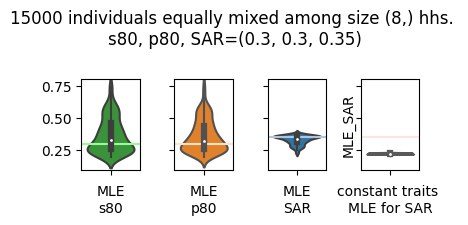

<Figure size 432x288 with 0 Axes>

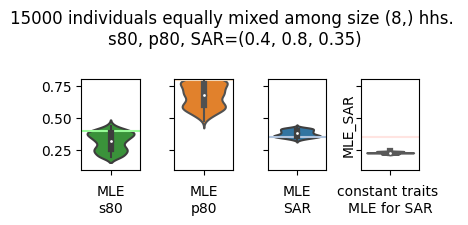

<Figure size 432x288 with 0 Axes>

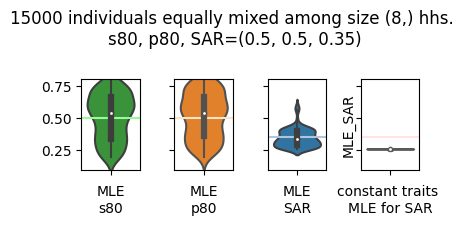

<Figure size 432x288 with 0 Axes>

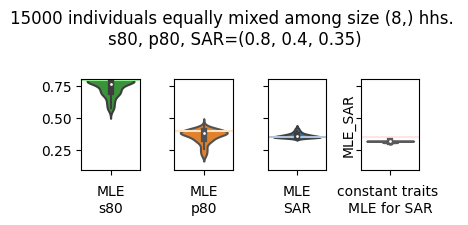

<Figure size 432x288 with 0 Axes>

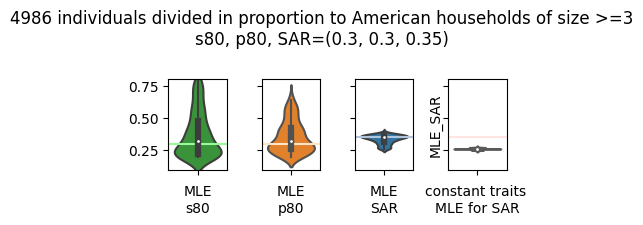

<Figure size 432x288 with 0 Axes>

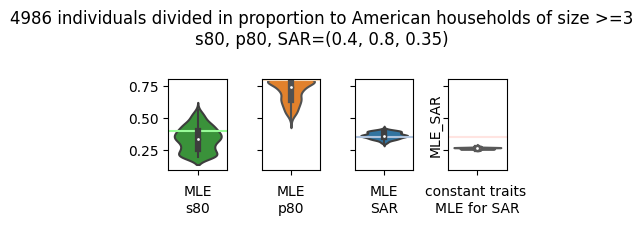

<Figure size 432x288 with 0 Axes>

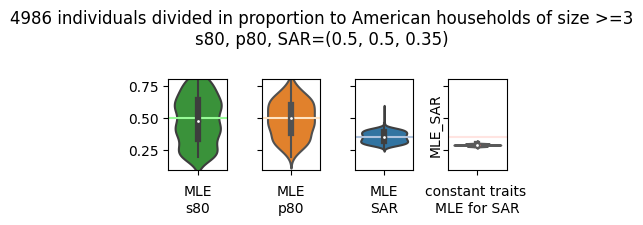

<Figure size 432x288 with 0 Axes>

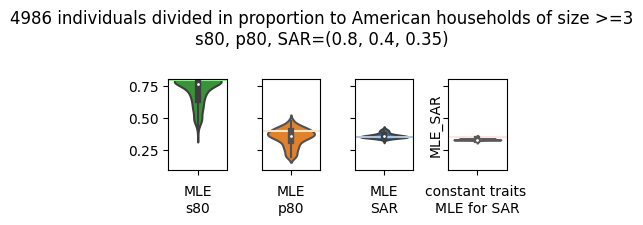

<Figure size 432x288 with 0 Axes>

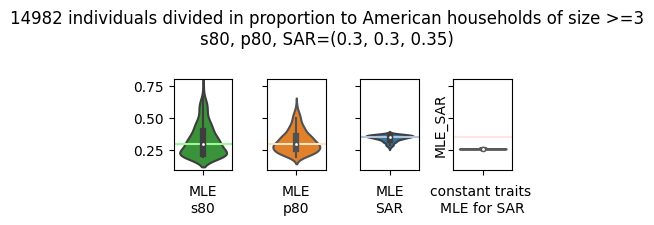

<Figure size 432x288 with 0 Axes>

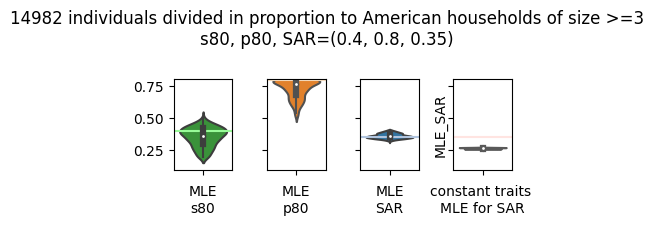

<Figure size 432x288 with 0 Axes>

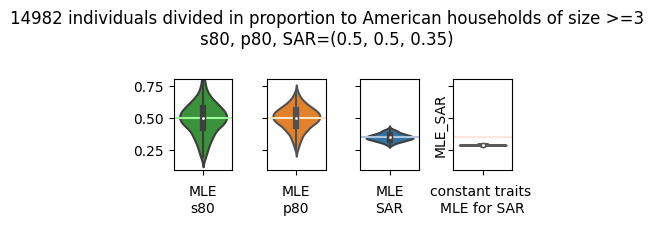

<Figure size 432x288 with 0 Axes>

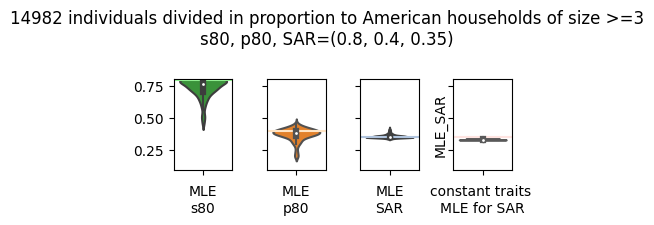

<Figure size 432x288 with 0 Axes>

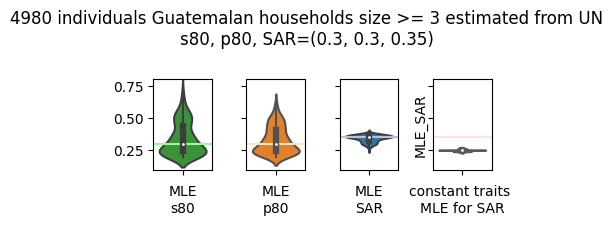

<Figure size 432x288 with 0 Axes>

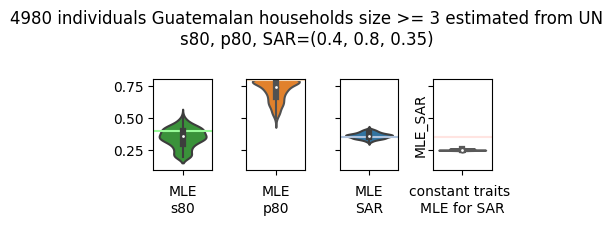

<Figure size 432x288 with 0 Axes>

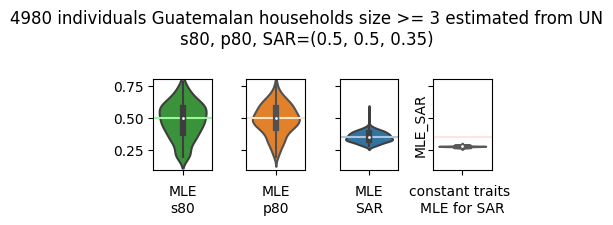

<Figure size 432x288 with 0 Axes>

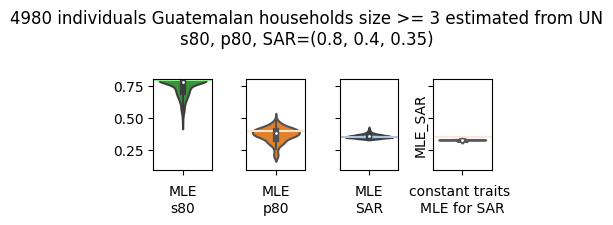

<Figure size 432x288 with 0 Axes>

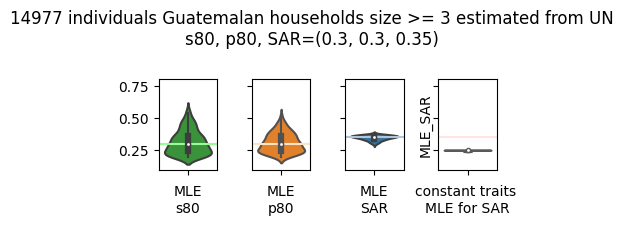

<Figure size 432x288 with 0 Axes>

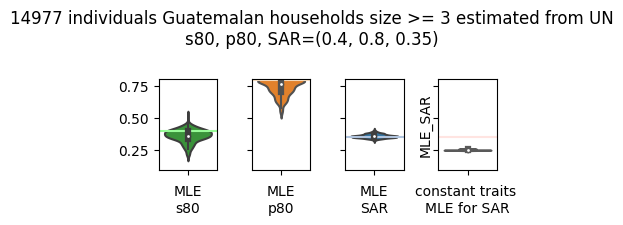

<Figure size 432x288 with 0 Axes>

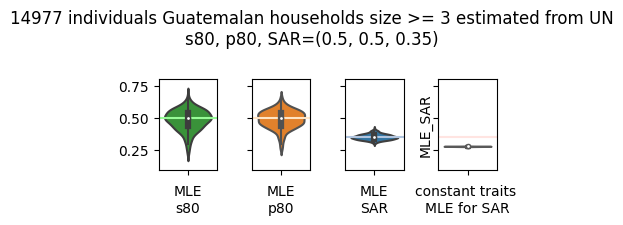

<Figure size 432x288 with 0 Axes>

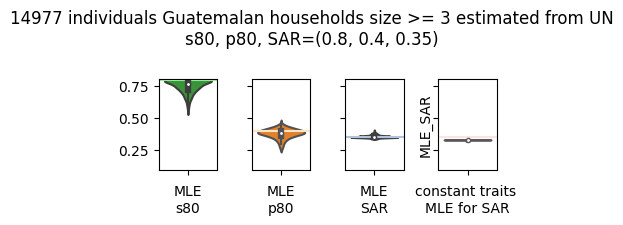

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.close('all')


dpi = 100
save_figs = False

fig_sizes = {'small':(4,2.25), 'big':(8,4.5)}
chosen_size = 'small'

#%matplotlib agg
min_dict = {0.6: 0.3, 0.4:0.10, 0.5: 0.15, 0.8: 0.5}
max_dict = {0.6: 0.8, 0.4:0.65, 0.5: 0.8, 0.8: 0.8}
colors = ['tab:green', 'tab:orange', 'tab:blue']
axline_colors = ['palegreen', 'bisque', 'lightsteelblue']
xlabels = ['MLE\ns80', 'MLE\np80', 'MLE\nSAR', 'constant traits \nMLE for SAR']
grouping =['population mix', 'sample size', 'parameters']

for k,g in fit_df.groupby(grouping):
    plt.figure()
    fig, axes = plt.subplots(1,4, dpi=dpi, sharey=True, figsize=fig_sizes[chosen_size])

    population_mix, sample_size, parameters = k
    population_name = None
    if isinstance(population_mix, str):
        population_name = population_mix
        description = population_descriptions[population_mix]
    else:
        description = 'equally mixed'
    if population_name:
        plt.suptitle(f"{sample_size} individuals {description}\ns80, p80, SAR={parameters}")
    else:
        plt.suptitle(f"{sample_size} individuals {description} among size {population_mix} hhs. \ns80, p80, SAR={parameters}")
    i = 0
    for c in g.columns:
        if 'MLE' not in c:
            continue
        if 's80' in c or 'p80' in c:
            parameter_index = 0 if 's80' in c else 1
            #mi, ma = min_dict[parameters[parameter_index]], max_dict[parameters[parameter_index]]
            mi, ma = 0.1, 0.8
            axes[i].set_ylim(mi, ma)
        if 'SAR' in c:
            pass
            #axes[i].set_ylim(0.1, 0.5)
            axes[i].set_ylim(0.1, 0.8)
        if parameters[i] == 0.8:
            axes[i].axhline(0.795, color=axline_colors[i])
        else:
            axes[i].axhline(parameters[i], color=axline_colors[i])
        sns.violinplot(y=c, data=g, ax=axes[i], orient="v", color=colors[i])
        axes[i].set(xlabel=xlabels[i], ylabel='')
        i += 1
    null_fit_slice = null_fit_df.groupby(['population mix', 'sample size', 'parameters']).get_group(k)
    #axes[3].set_ylim(0.1, 0.5)
    axes[3].set_ylim(0.1, 0.8)
    # plot the true SAR on the null hypothesis SAR
    axes[3].axhline(parameters[2], color='mistyrose')
    axes[3].set(xlabel=xlabels[3], ylabel='')
    sns.violinplot(y=null_fit_slice['MLE_SAR'], data=null_fit_slice, ax=axes[3], orient="v", color='indianred')
    #axes[3].set(ylabel='MLE of SAR assuming no heterogeneity')
    fig.tight_layout()
    if save_figs:
        plt.savefig(os.path.join('/Users/thayer/covid_households/batched_figs', f'{k}' + '.jpg'))

The cell below will plot violins for all the parameters over a variety of different populations.

<Figure size 432x288 with 0 Axes>

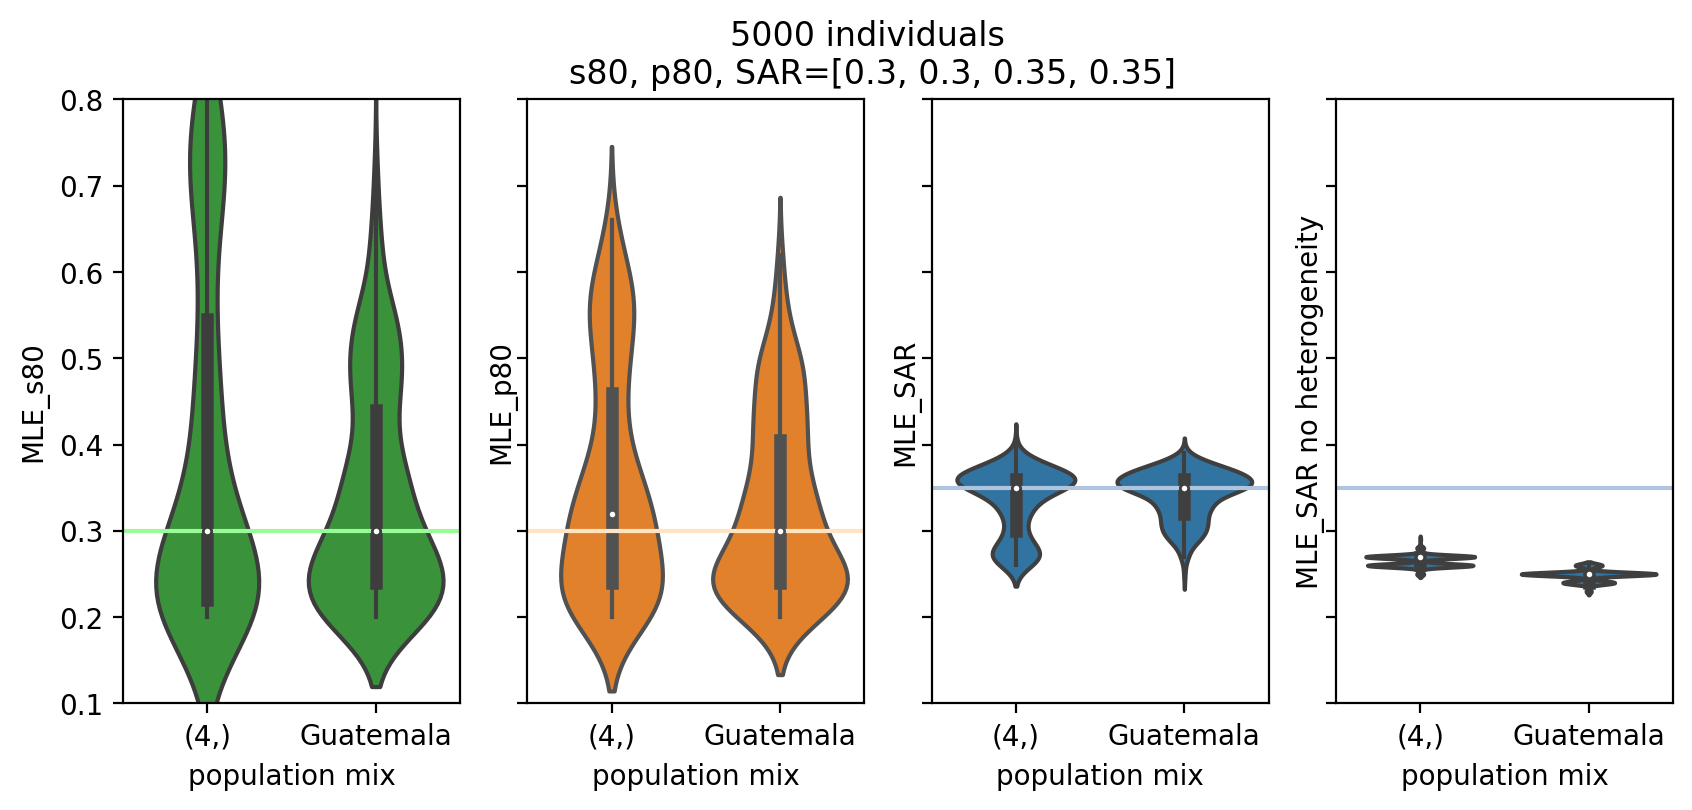

<Figure size 432x288 with 0 Axes>

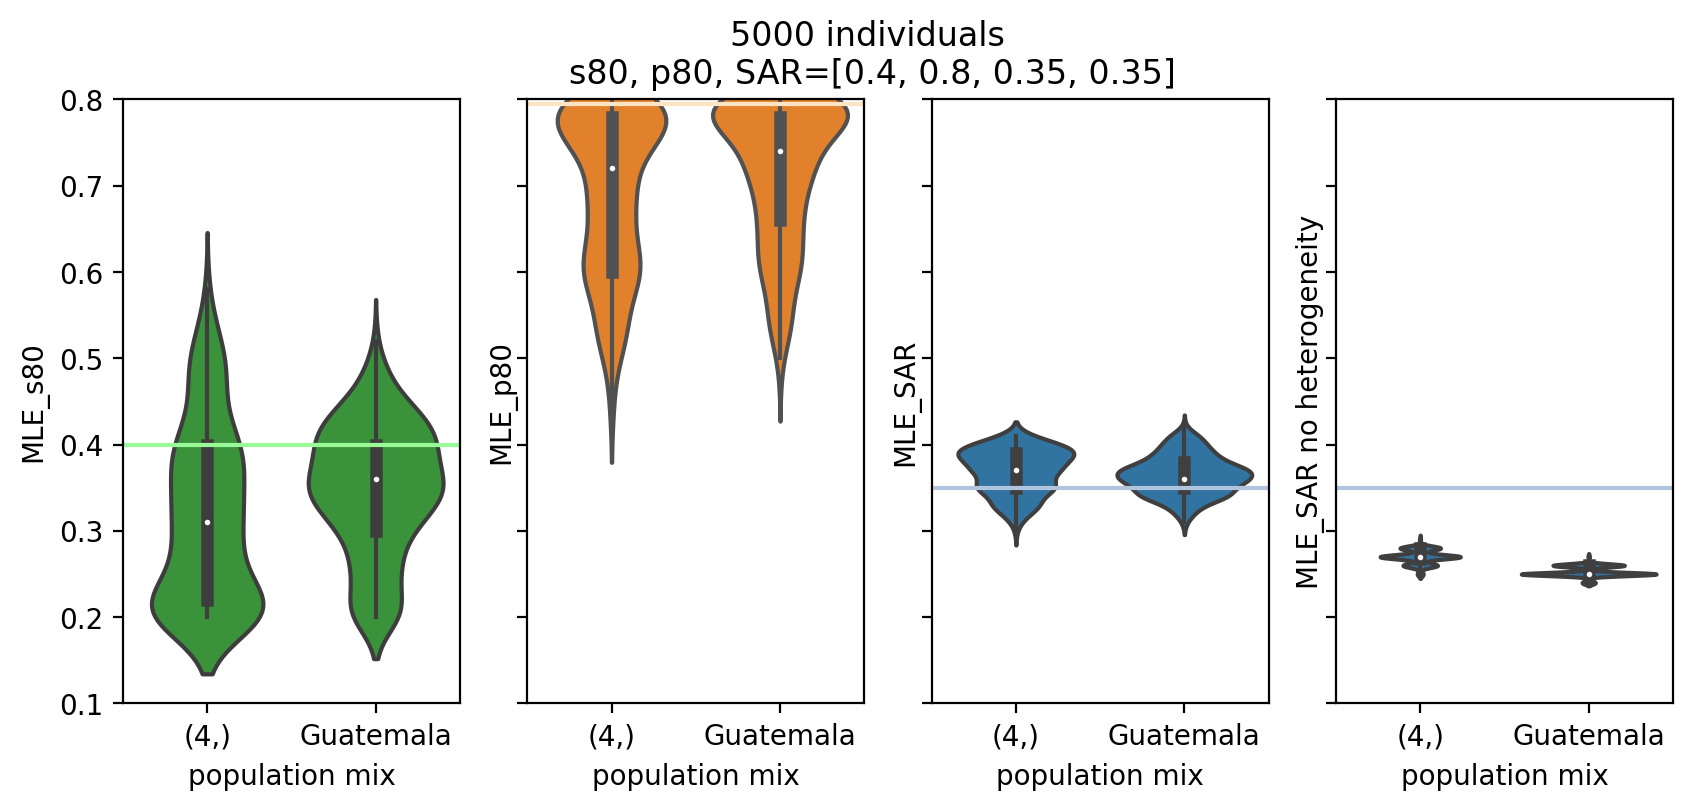

<Figure size 432x288 with 0 Axes>

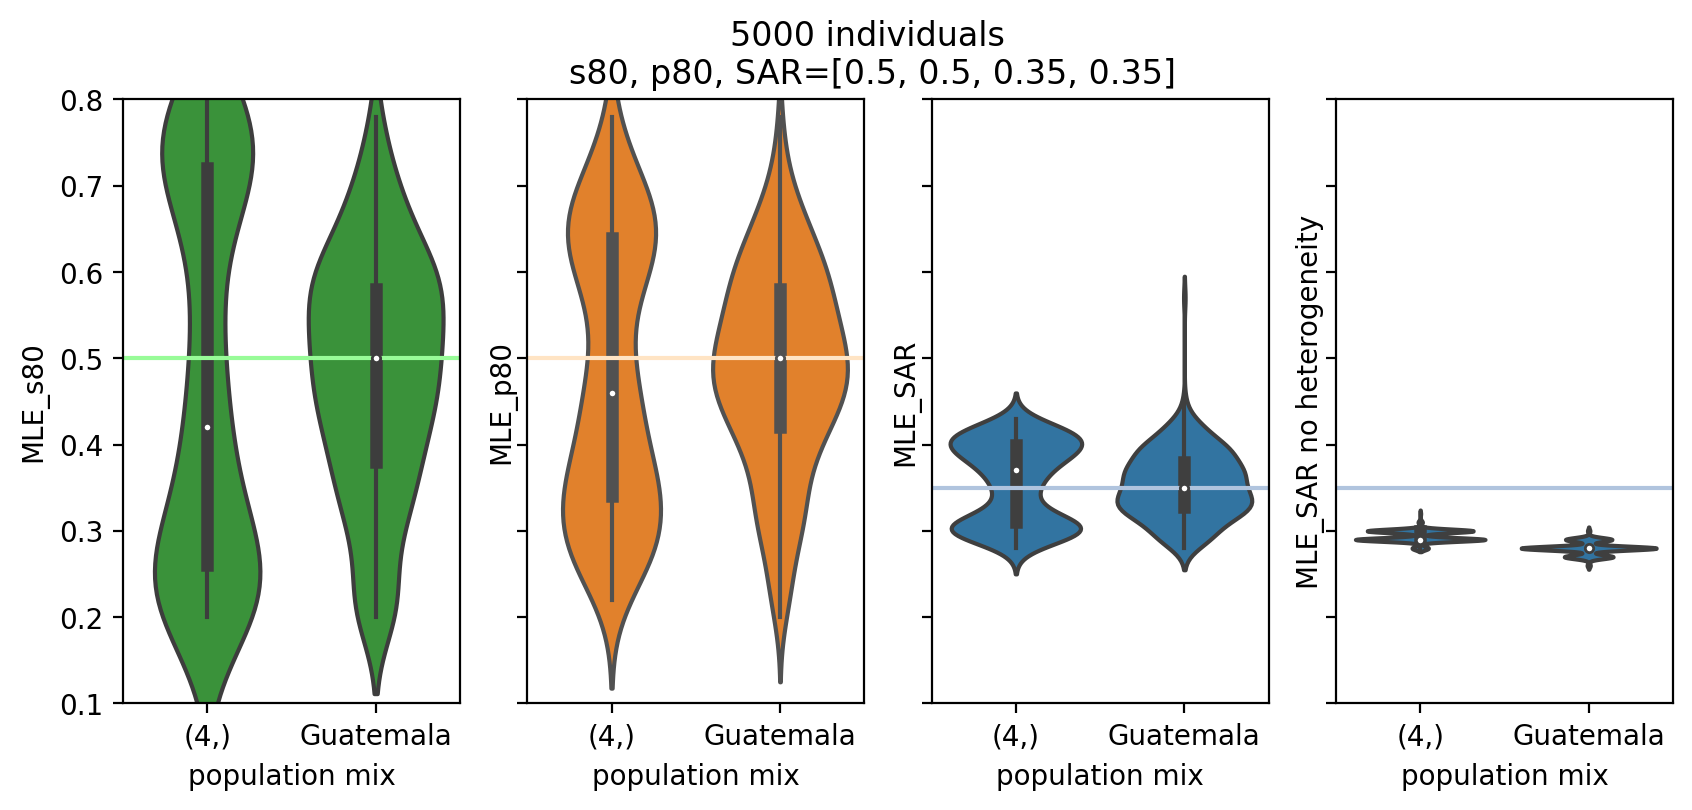

<Figure size 432x288 with 0 Axes>

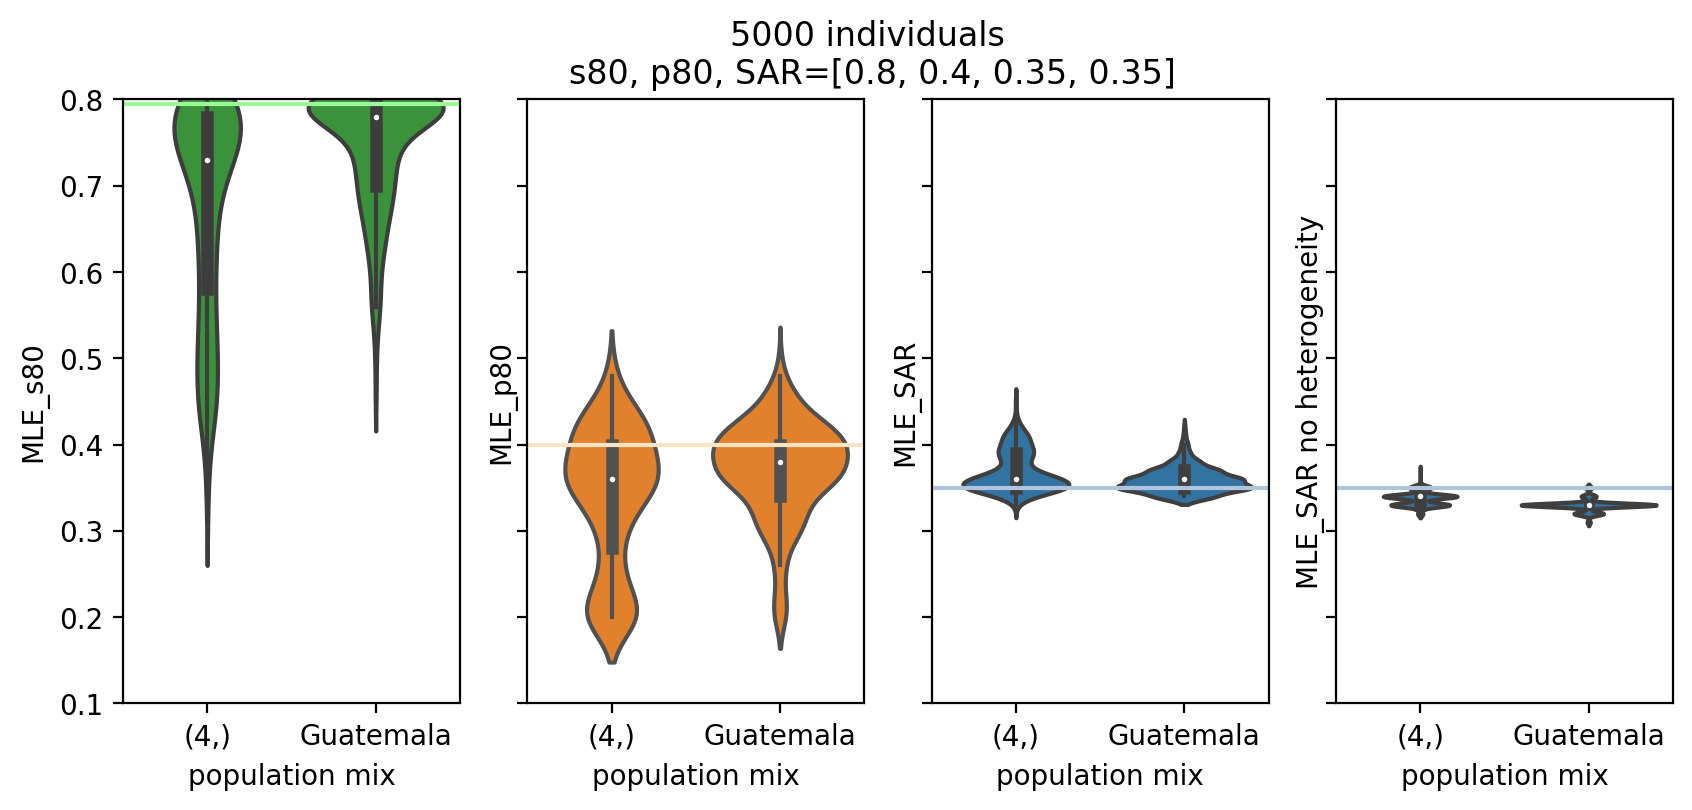

<Figure size 432x288 with 0 Axes>

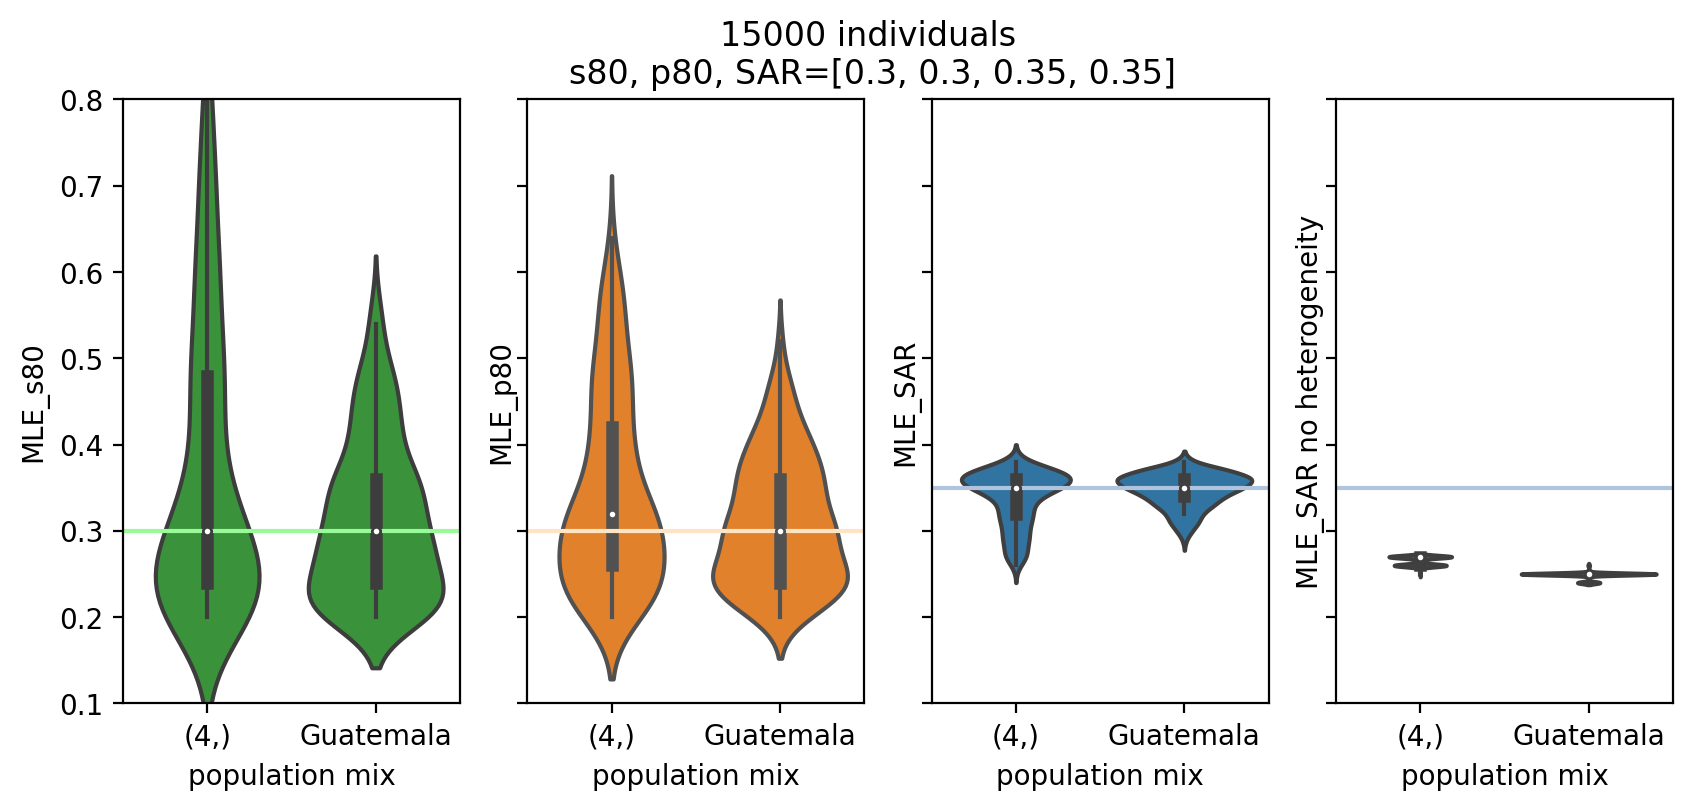

<Figure size 432x288 with 0 Axes>

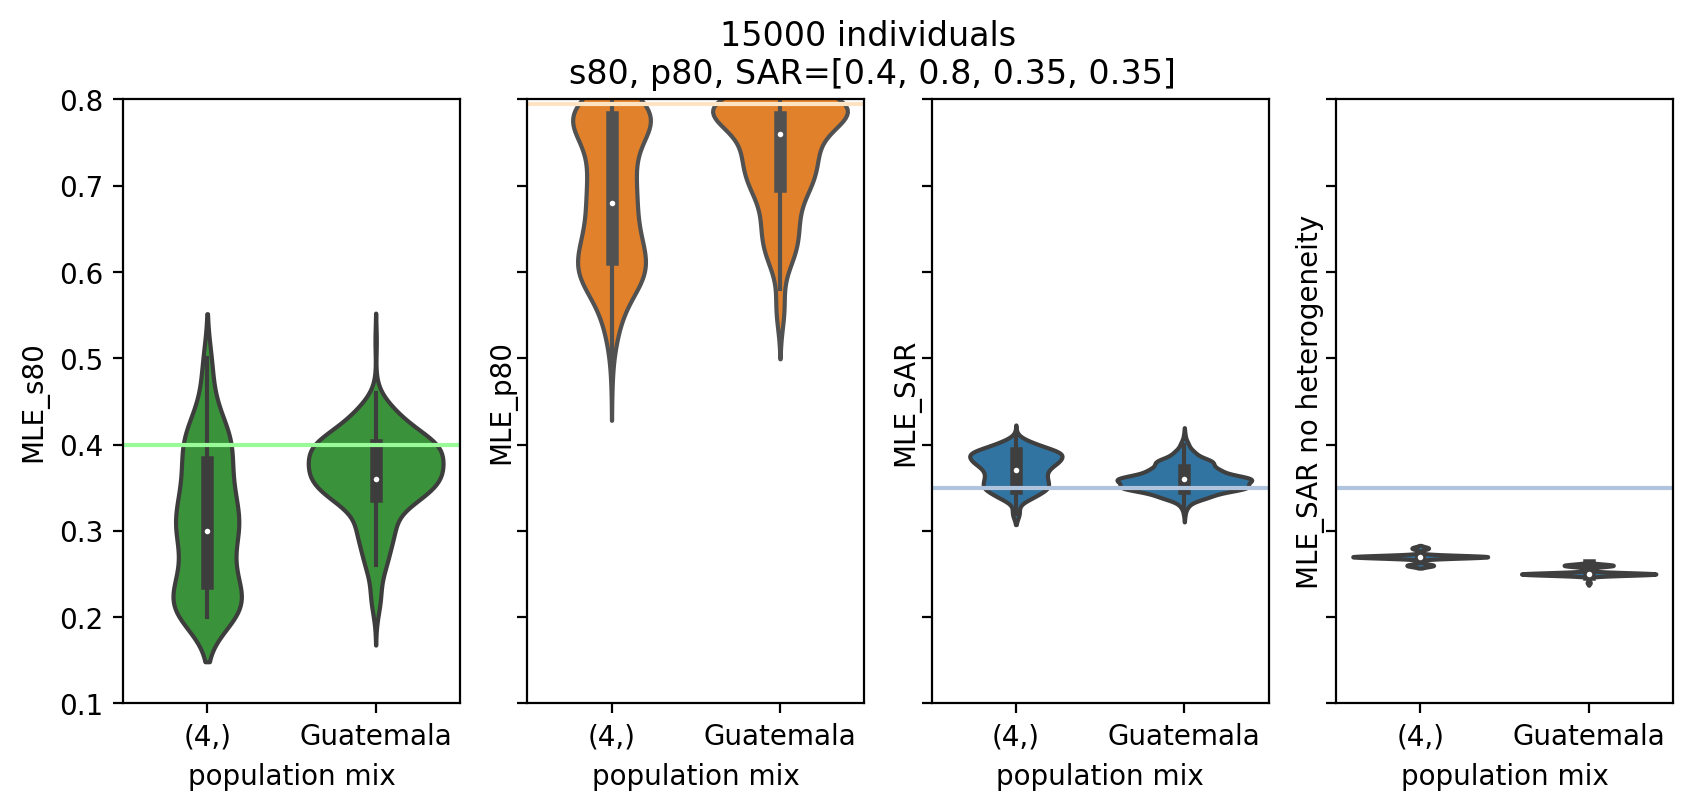

<Figure size 432x288 with 0 Axes>

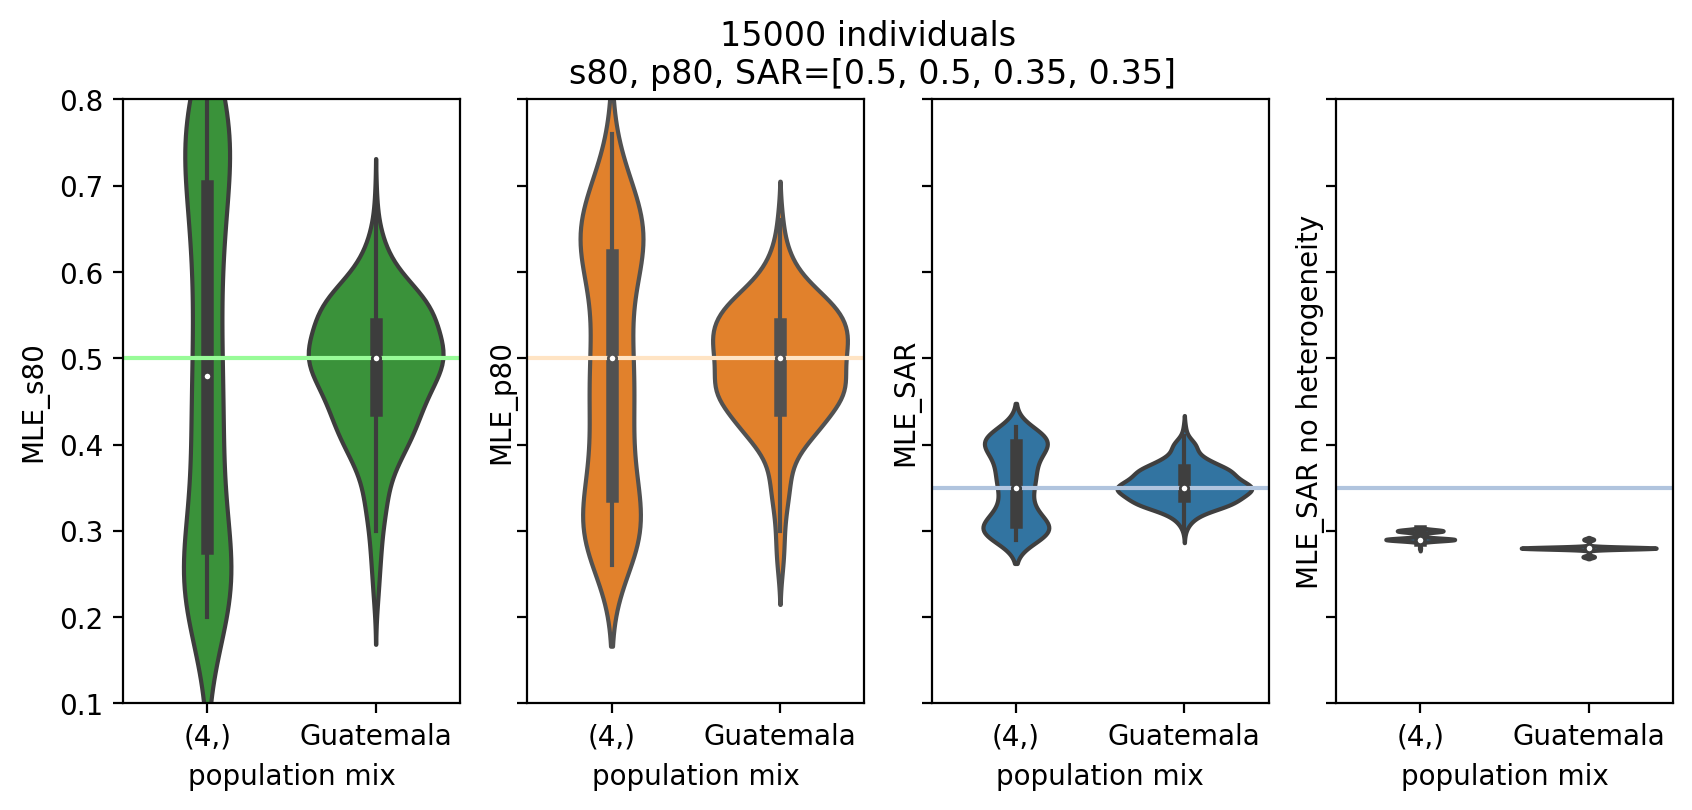

<Figure size 432x288 with 0 Axes>

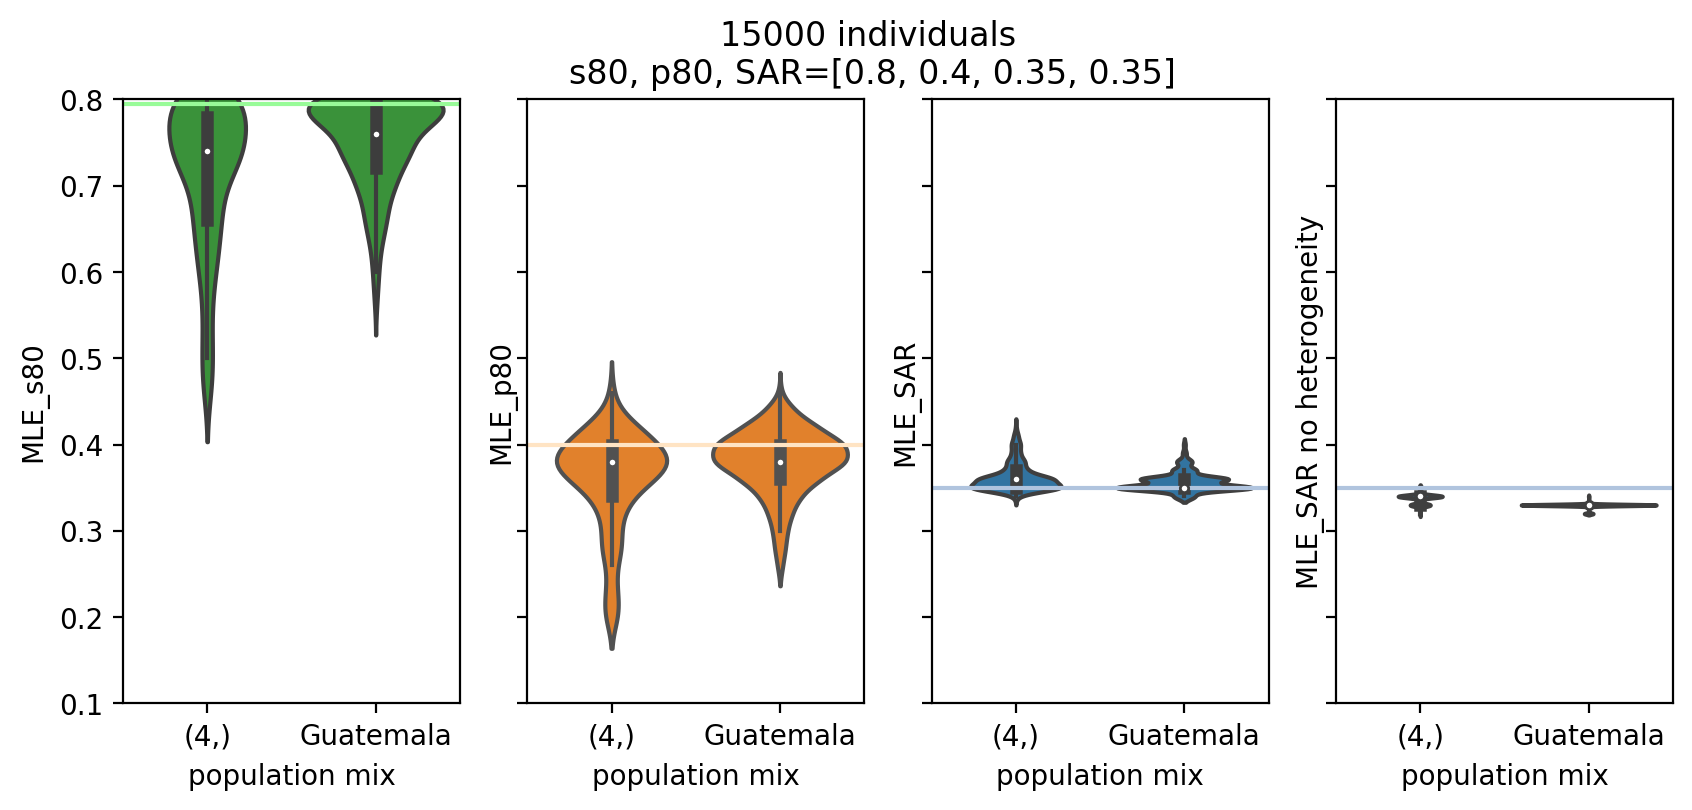

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.close('all')

#hypothesis = 'SAR and susceptibility vary'
hypothesis = 'all'
fit_df = fits[hypothesis]

dpi = 200
save_figs = False

fig_sizes = {'small':(4,2.25), 'big':(10,4)}
chosen_size = 'big'

#%matplotlib agg
min_dict = {0.6: 0.3, 0.4:0.10, 0.5: 0.15, 0.8: 0.5}
max_dict = {0.6: 0.8, 0.4:0.65, 0.5: 0.8, 0.8: 0.8}
colors = ['tab:green', 'tab:orange', 'tab:blue', 'tab:blue']
axline_colors = ['palegreen', 'bisque', 'lightsteelblue', 'lightsteelblue']
xlabels = ['MLE\ns80', 'MLE\np80', 'MLE\nSAR', 'constant traits \nMLE for SAR']

drop_rules = {
    'population mix': ['Philippines', 'Mexico', (8,), 'America_census'],
}
#ordered_included_pops = ['America_UN', 'Guatemala', (8,)]#, (4,)]
ordered_included_pops = ['Guatemala', (4,)]

def apply_drop_rules(df, drop_rules):
    new_df = df.copy()
    for column,exclusions in drop_rules.items():
        for exclusion in exclusions:
            new_df = new_df[new_df[column] != exclusion]
    return new_df

# Use the 'drop_rules' dictionary to forget any populations we don't care about to render a cleaned up figure
new_fit_df = apply_drop_rules(fit_df, drop_rules)
new_fit_df['population mix'] = new_fit_df['population mix'].astype(str)
null_hypothesis_fit_df = apply_drop_rules(fits['null hypothesis'], drop_rules)

# add the 'null hypothesis' SAR estimates into the dataframe so they'll be an accessible column in plotting
null_SARs = null_hypothesis_fit_df['MLE_SAR']
null_SARs.name = 'MLE_SAR no heterogeneity'
new_fit_df = pd.concat([new_fit_df, null_SARs], axis=1)

grouping=['written sample size', 'parameters']
for key,group in new_fit_df.groupby(grouping):
    sample_size, parameters = key
    # The true SAR is the same regardless of null hypothesis vs standard hypothesis
    # but the `key` in the index isn't long enough because it doesn't know that we care about the null hypothesis
    # so we add the true SAR as the line for "actual value" for the null hypothesis subplot
    parameters = list(parameters) + [parameters[-1]]
    plt.figure()
    fig, axes = plt.subplots(1,len(results.metadata.parameters)+1, dpi=dpi, sharey=True, figsize=fig_sizes[chosen_size])
    null_fit_group = null_hypothesis_fit_df.groupby(grouping).get_group(key)
    relevant_parameters = list(results.metadata.parameters) + ['SAR no heterogeneity']
    for param_index,parameter in enumerate(relevant_parameters):
        seaborn_parameter_name = parameter
        plt.suptitle(f"{sample_size} individuals \ns80, p80, SAR={parameters}")
        sns.violinplot(x='population mix', y=f'MLE_{seaborn_parameter_name}', data=group, ax=axes[param_index], orient="v", color=colors[param_index])
        if parameters[param_index] == 0.8:
            axes[param_index].axhline(0.795, color=axline_colors[param_index])
        else:
            axes[param_index].axhline(parameters[param_index], color=axline_colors[param_index])
        mi, ma = 0.1, 0.8
        axes[param_index].set_ylim(mi, ma)
    if save_figs:
        plt.savefig(os.path.join('/Users/thayer/covid_households/batched_figs', f'{key}' + '.jpg'))

The cell below will plot violins for all the parameters over a group of sample sizes.

     trial  MLE_s80  MLE_p80  MLE_SAR  sample size population mix  \
0        0     0.28     0.32     0.38          980      Guatemala   
1        1     0.20     0.20     0.51          980      Guatemala   
2        2     0.20     0.20     0.60          980      Guatemala   
3        3     0.76     0.80     0.26          980      Guatemala   
4        4     0.52     0.48     0.36          980      Guatemala   
..     ...      ...      ...      ...          ...            ...   
295    295     0.38     0.78     0.35        14977      Guatemala   
296    296     0.30     0.68     0.38        14977      Guatemala   
297    297     0.38     0.76     0.36        14977      Guatemala   
298    298     0.34     0.66     0.37        14977      Guatemala   
299    299     0.30     0.68     0.38        14977      Guatemala   

           parameters p80_interval  s80_interval  SAR_interval  \
0    (0.5, 0.5, 0.35)   (0.2, 0.8)    (0.2, 0.8)   (0.23, 0.6)   
1    (0.5, 0.5, 0.35)   (0.2, 0.8)    (

<Figure size 432x288 with 0 Axes>

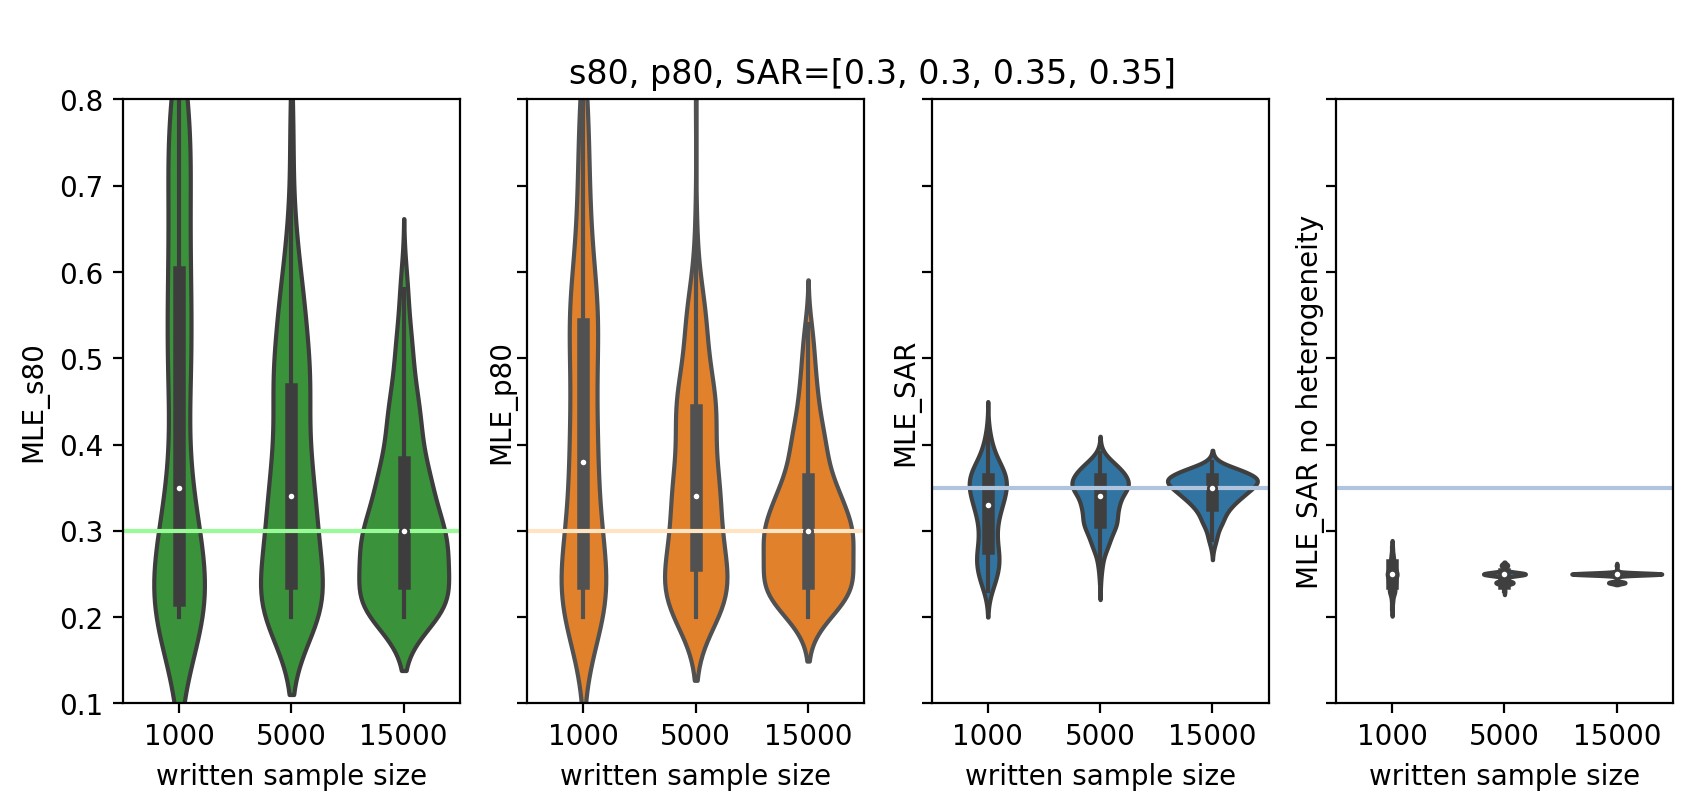

<Figure size 432x288 with 0 Axes>

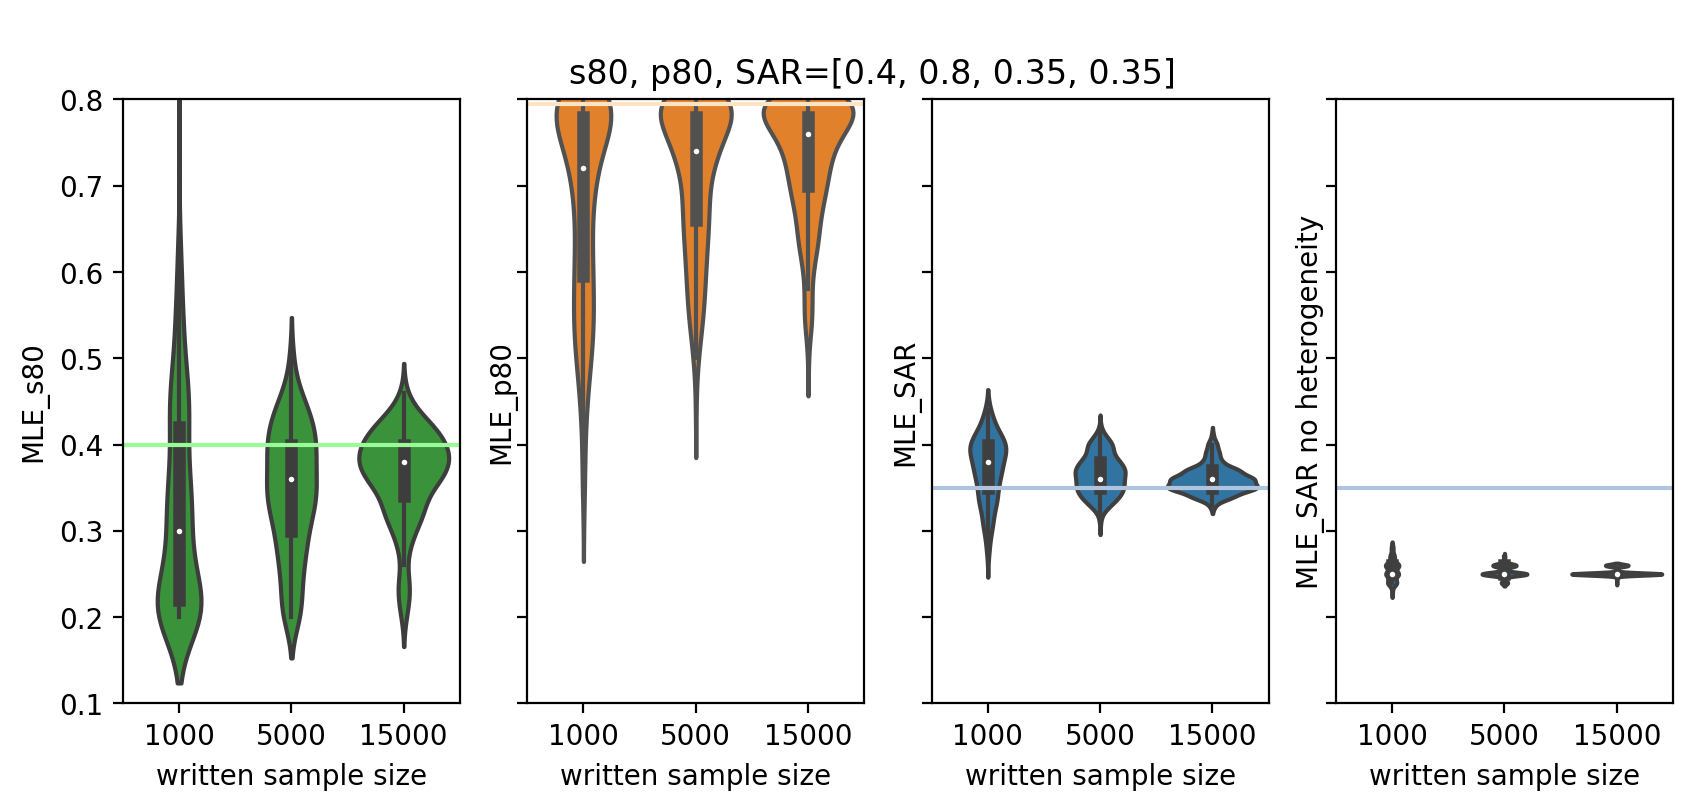

<Figure size 432x288 with 0 Axes>

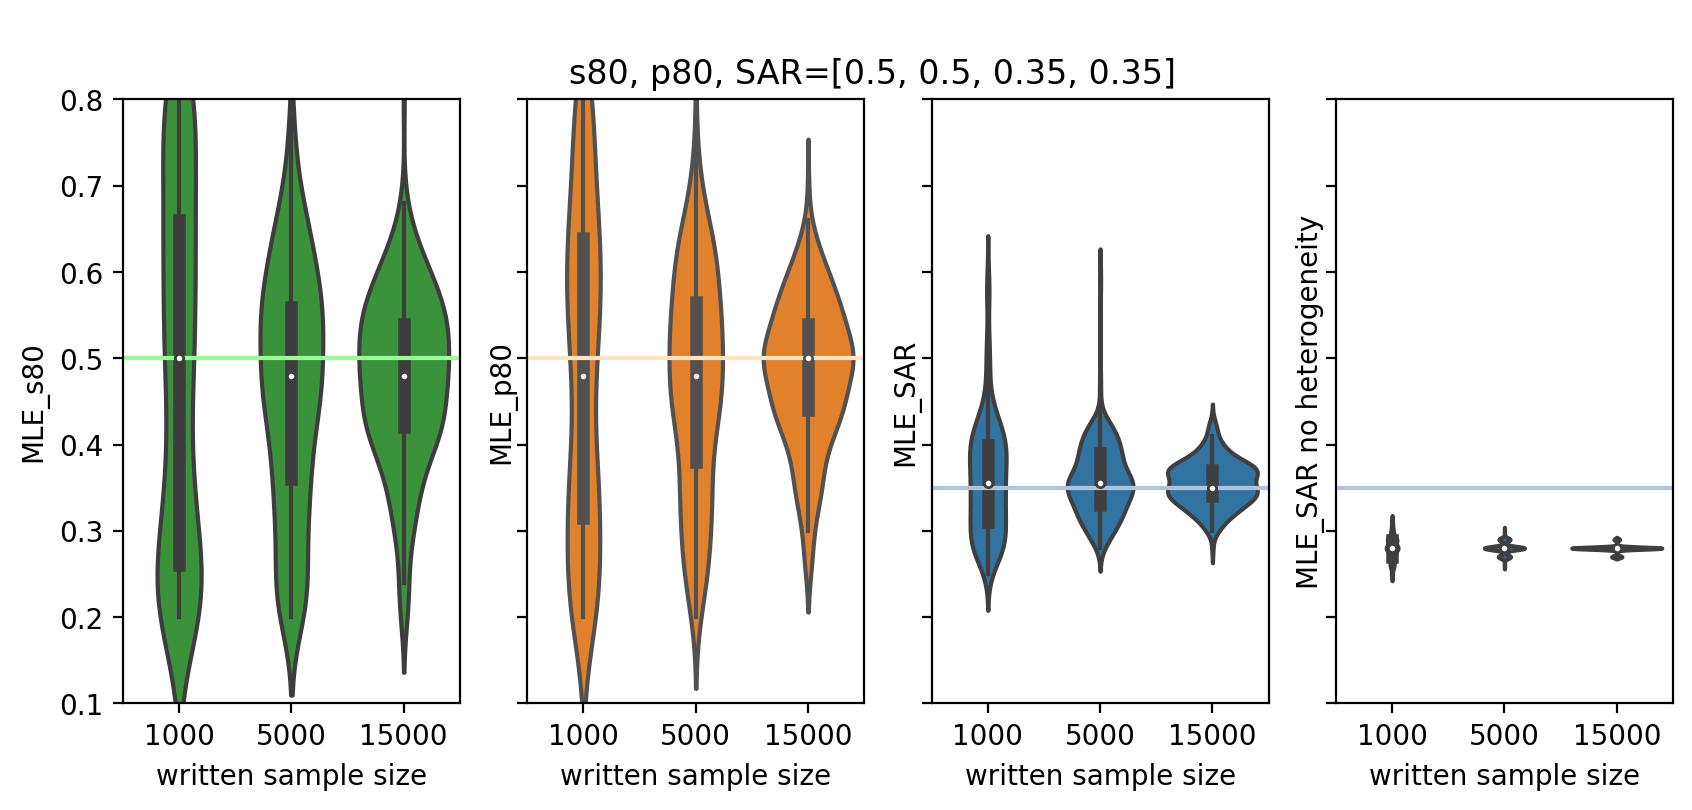

<Figure size 432x288 with 0 Axes>

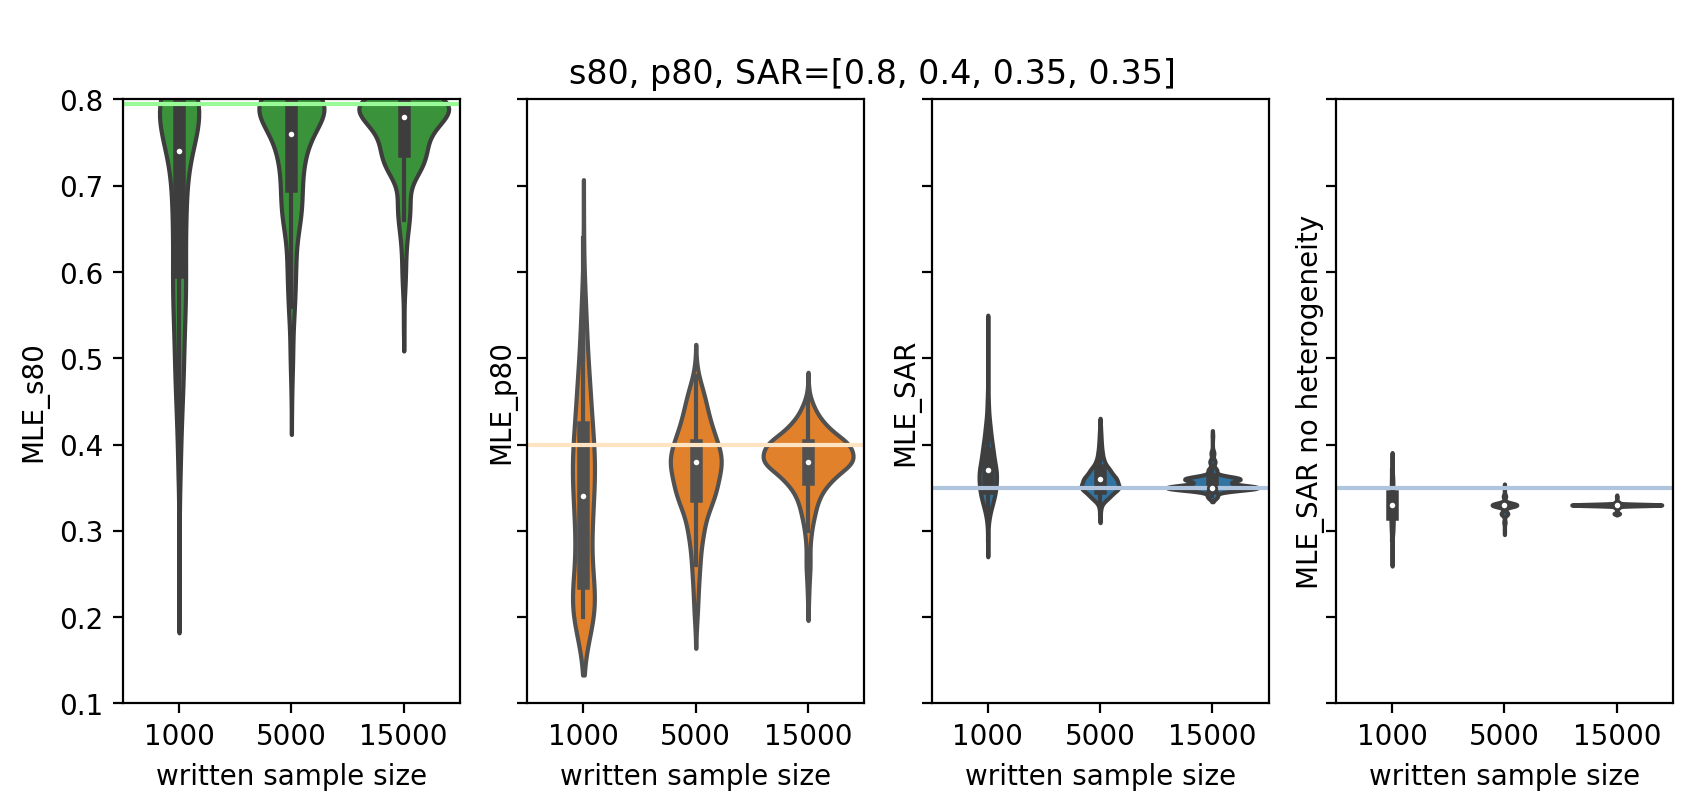

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.close('all')

#hypothesis = 'SAR and susceptibility vary'
hypothesis = 'all'
fit_df = fits[hypothesis]

dpi = 200
save_figs = True

fig_sizes = {'small':(4,2.25), 'big':(10,4)}
chosen_size = 'big'

#%matplotlib agg
min_dict = {0.6: 0.3, 0.4:0.10, 0.5: 0.15, 0.8: 0.5}
max_dict = {0.6: 0.8, 0.4:0.65, 0.5: 0.8, 0.8: 0.8}
colors = ['tab:green', 'tab:orange', 'tab:blue', 'tab:blue']
axline_colors = ['palegreen', 'bisque', 'lightsteelblue', 'lightsteelblue']
xlabels = ['MLE\ns80', 'MLE\np80', 'MLE\nSAR', 'constant traits \nMLE for SAR']

chosen_pop = 'Guatemala'

def select_pop(df, chosen_pop):
    new_df = df.copy()
    new_df = new_df[new_df['population mix'] == chosen_pop]
    return new_df

# Choose only one population for plotting
new_fit_df = select_pop(fit_df, chosen_pop)
print(new_fit_df)
new_fit_df['population mix'] = new_fit_df['population mix'].astype(str)

# add the 'null hypothesis' SAR estimates into the dataframe so they'll be an accessible column in plotting
# but first select the population in the null hypothesis frequencies as well
null_hypothesis_fit_df = select_pop(fits['null hypothesis'], chosen_pop)
null_SARs = null_hypothesis_fit_df['MLE_SAR']
null_SARs.name = 'MLE_SAR no heterogeneity'
print(null_SARs)
new_fit_df = pd.concat([new_fit_df, null_SARs], axis=1)

grouping=['parameters']
for key,group in new_fit_df.groupby(grouping):
    print(group)
    parameters = key
    # The true SAR is the same regardless of null hypothesis vs standard hypothesis
    # but the `key` in the index isn't long enough because it doesn't know that we care about the null hypothesis
    # so we add the true SAR as the line for "actual value" for the null hypothesis subplot
    parameters = list(parameters) + [parameters[-1]]
    plt.figure()
    fig, axes = plt.subplots(1,len(results.metadata.parameters)+1, dpi=dpi, sharey=True, figsize=fig_sizes[chosen_size])
    null_fit_group = null_hypothesis_fit_df.groupby(grouping).get_group(key)
    relevant_parameters = list(results.metadata.parameters) + ['SAR no heterogeneity']
    for param_index,parameter in enumerate(relevant_parameters):
        seaborn_parameter_name = parameter
        plt.suptitle(f"\ns80, p80, SAR={parameters}")
        sns.violinplot(x='written sample size', y=f'MLE_{seaborn_parameter_name}', data=group, ax=axes[param_index], orient="v", color=colors[param_index])
        if parameters[param_index] == 0.8:
            axes[param_index].axhline(0.795, color=axline_colors[param_index])
        else:
            axes[param_index].axhline(parameters[param_index], color=axline_colors[param_index])
        mi, ma = 0.1, 0.8
        axes[param_index].set_ylim(mi, ma)
    if save_figs:
        plt.savefig(os.path.join('/Users/thayer/covid_households/batched_figs', f'{key}' + '.jpg'))

In [17]:
new_fit_df['population mix'].astype(str)

'(8,)'

In [ ]:
fit_df

In [ ]:
relevant_data = fit_df[(fit_df['population mix'] == (4,5,6,7,8)) & (fit_df['parameters'] == (0.4, 0.8, 0.25))]

import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x='sample size', y='MLE_p80', kind='swarm', data=relevant_data, s=3)
plt.ylim((0.1, 0.8))

In [ ]:
null_fits = null_fit_df['MLE_SAR'].copy()
null_fits.name = 'No traits \n MLE for SAR'
version_2_df = pd.concat([fit_df, null_fits], axis=1)

params = ['population mix', 'sample size', 'parameters']
for k,g in version_2_df.groupby(params):
    data = g.drop(params, axis=1)
    plt.figure(dpi=800)
    fig = sns.violinplot(data=data)
    fig.set_ylim(0.1, 0.8)
    plt.savefig(os.path.join('/Users/thayer/covid_households/batched_figs', 'v2' + f'{k}' + '.jpg'))
    break

In [ ]:
means = fit_df.groupby(['population mix', 'sample size', 'parameters']).mean()
stds = fit_df.groupby(['population mix', 'sample size', 'parameters']).std()
stds.columns = ['STD_' + s for s in stds.columns]

statistics = pd.concat([means, stds], axis=1)
with open('/Users/thayer/covid_households/batched_figs/stats.csv', 'w') as f:
    statistics.to_csv(f)

In [ ]:
stds.sort_values(by='STD_MLE_s80')
with open('/Users/thayer/covid_households/batched_figs/stds.csv', 'w') as f:
    stds.to_csv(f)

with open('/Users/thayer/covid_households/batched_figs/means.csv', 'w') as f:
    means.to_csv(f)

# Power calculation

In [64]:
import likelihood

def SAR_pvalue_for_trial(baseline_logl, comparison_logl, for_increase=False):
    baseline_posterior = np.exp(baseline_logl.sort_values(ascending=False)-baseline_logl.max())
    baseline_posterior = baseline_posterior/baseline_posterior.sum()
    # we groupby 'SAR' and sum so that we can capture all the probability at that SAR — regardless of other parameter values
    baseline_probability_over_sars = baseline_posterior.groupby('SAR').sum()

    comparison_posterior = np.exp(comparison_logl.sort_values(ascending=False)-comparison_logl.max())
    baseline_SAR_confidence_interval = likelihood.confidence_interval_from_confidence_mask(likelihood.confidence_mask_from_logl(baseline_logl, percentiles=(0.9,)), key='SAR')
    comparison_SAR_confidence_interval = likelihood.confidence_interval_from_confidence_mask(likelihood.confidence_mask_from_logl(comparison_logl, percentiles=(0.9,)), key='SAR')
    comparison_posterior = comparison_posterior/comparison_posterior.sum()
    probability_over_sars = comparison_posterior.groupby('SAR').sum()

    # use the probability surface to generate imagined MLEs
    sample1 = np.random.choice(baseline_probability_over_sars.index, 10000, p=baseline_probability_over_sars)
    sample2 = np.random.choice(probability_over_sars.index, 10000, p=probability_over_sars)

    # what fraction of the time does the first group have a increased/decreased SAR compared to the second group
    if for_increase:
        pvalue = np.count_nonzero((sample2-sample1) > 0)/len(sample1)
    else:
        pvalue = np.count_nonzero((sample2-sample1) < 0)/len(sample1)

    return pvalue, baseline_SAR_confidence_interval, comparison_SAR_confidence_interval

interval_notes = defaultdict(list)

def calculate_power_over_SAR_range(population, trials, basline_parameters, sar_range, hypotheses, for_increase=False):
    pvalue_sets = []
    for hypothesis_name in hypotheses.keys():
        frequencies = frequencies_by_hypothesis[hypothesis_name]
        for sar in sar_range:
            # replace baseline sar with target sar
            parameters = list(basline_parameters)
            parameters[results.metadata.parameters.index('SAR')] = float(f'{sar:0.3f}')
            parameters = tuple(parameters)
            print(parameters)
   
            # get imagined infections from the simulated data at the baseline parameters to establish the probability surface for the MLE w.r.t. the baseline
            samples = results.resample(basline_parameters, population, trials=trials)
            baseline_logl = likelihood.logl_from_frequencies_and_counts(frequencies, samples['count'], results.metadata.parameters)

            # get imagined infections from the simulated data at the comparison parameters to establish the probability surface for the MLE w.r.t. the comparison point
            samples = results.resample(parameters, population, trials=trials)
            logl = likelihood.logl_from_frequencies_and_counts(frequencies, samples['count'], results.metadata.parameters)

            comparison_logl_grouped = logl.groupby('trial')
            single_trial_pvalues = []
            for key, baseline_logl_trial_group in baseline_logl.groupby('trial'):
                comparison_logl_trial_group = comparison_logl_grouped.get_group(key)
                pvalue, baseline_SAR_confidence_interval, comparison_SAR_confidence_interval = SAR_pvalue_for_trial(baseline_logl_trial_group, comparison_logl_trial_group, for_increase=for_increase)
                single_trial_pvalues.append(pvalue)
            #index = pd.MultiIndex.from_product([sar, hypothesis_name, list(range(trials))], names=['SAR', 'hypothesis', 'trial'])
            #pvalue_sets.append(pd.Series(data=single_trial_pvalues, index=index))
            pvalue_sets.append(pd.DataFrame({'pvalue':single_trial_pvalues, 'SAR':sar, 'hypothesis':hypothesis_name, 'trial':list(range(trials))}))
    df_piece = pd.concat(pvalue_sets)
    return df_piece


In [74]:
sar_range = np.linspace(0.20, 0.30, 2)
trials = 1000

baseline_parameter_sets = [
    (0.8, 0.8, 0.4),
    #(0.7, 0.7, 0.4),
    #(0.6, 0.6, 0.4),
    (0.5, 0.5, 0.4),
    #(0.4, 0.4, 0.4),
    (0.3, 0.3, 0.4),
]

populations = [
    #{4:50},
    #{2:100},
    #{8:125},
    #{2:500}
    #{2:33, 4:17, 8:8},
    {3:83, 4:63, 5:50, 6:42},
    {4:83, 6:56, 8:42}
    #{4:250}
]

hypotheses = {
    'all': ['s80', 'p80', 'SAR'],
    #'SAR and infectivity vary': ['p80', 'SAR'],
    #'null hypothesis': ['SAR'],
}
frequencies_by_hypothesis = {k: restrict_parameters(results, included_parameters) for k,included_parameters in hypotheses.items()}

power_pvalue = 0.9

pvalue_dfs = []
from collections import defaultdict
power_dfs = defaultdict(list)

pvalue_df_pieces = []
for baseline_parameters in baseline_parameter_sets:
    for population in populations:
        pvalue_df_piece = calculate_power_over_SAR_range(population, trials, baseline_parameters, sar_range, hypotheses)
        pvalue_df_piece['parameters'] = str(baseline_parameters)
        pvalue_df_piece['population'] = str(population)
        print(pvalue_df_piece)
        pvalue_df_pieces.append(pvalue_df_piece)
        #pvalue_df = pd.DataFrame(pvalues_for_decrease, index=[float(f'{sar:0.3f}') for sar in sar_range]).transpose()
        #pvalue_dfs.append(pvalue_df)
        #power = ((pvalue_df > power_pvalue).sum()/trials)
        #power.name = str(population)
        #power_dfs[baseline_parameters].append(power)
pvalue_df = pd.concat(pvalue_df_pieces)
pvalue_df = pvalue_df.set_index(['population', 'parameters', 'hypothesis', 'SAR', 'trial']).squeeze().unstack([0,1,2,3])
pvalue_df = (pvalue_df > 0.9).sum()/trials
pvalue_df.name = 'power'

(0.8, 0.8, 0.2)
(0.8, 0.8, 0.3)
     pvalue  SAR hypothesis  trial       parameters  \
0    1.0000  0.2        all      0  (0.8, 0.8, 0.4)   
1    1.0000  0.2        all      1  (0.8, 0.8, 0.4)   
2    1.0000  0.2        all      2  (0.8, 0.8, 0.4)   
3    1.0000  0.2        all      3  (0.8, 0.8, 0.4)   
4    1.0000  0.2        all      4  (0.8, 0.8, 0.4)   
..      ...  ...        ...    ...              ...   
995  0.9708  0.3        all    995  (0.8, 0.8, 0.4)   
996  0.9710  0.3        all    996  (0.8, 0.8, 0.4)   
997  0.7693  0.3        all    997  (0.8, 0.8, 0.4)   
998  0.9437  0.3        all    998  (0.8, 0.8, 0.4)   
999  0.9784  0.3        all    999  (0.8, 0.8, 0.4)   

                       population  
0    {3: 83, 4: 63, 5: 50, 6: 42}  
1    {3: 83, 4: 63, 5: 50, 6: 42}  
2    {3: 83, 4: 63, 5: 50, 6: 42}  
3    {3: 83, 4: 63, 5: 50, 6: 42}  
4    {3: 83, 4: 63, 5: 50, 6: 42}  
..                            ...  
995  {3: 83, 4: 63, 5: 50, 6: 42}  
996  {3: 83, 4: 63,

In [75]:
pvalue_df = pvalue_df.reset_index().set_index(['population', 'SAR', 'parameters', 'hypothesis',]).squeeze().sort_index()

In [76]:
pvalue_df.unstack([1,2]).round(2)#.to_excel('./powers_200_pop_2500_trials_mix.xlsx')

SAR                                                 0.2                  \
parameters                              (0.3, 0.3, 0.4) (0.5, 0.5, 0.4)   
population                   hypothesis                                   
{3: 83, 4: 63, 5: 50, 6: 42} all                    1.0             1.0   
{4: 83, 6: 56, 8: 42}        all                    1.0             1.0   

SAR                                                                 0.3  \
parameters                              (0.8, 0.8, 0.4) (0.3, 0.3, 0.4)   
population                   hypothesis                                   
{3: 83, 4: 63, 5: 50, 6: 42} all                    1.0            0.75   
{4: 83, 6: 56, 8: 42}        all                    1.0            0.70   

SAR                                                                      
parameters                              (0.5, 0.5, 0.4) (0.8, 0.8, 0.4)  
population                   hypothesis                                  
{3: 83, 4: 63, 5: 50, 6: 42} all                   0.73            0.63  
{4: 83, 6: 56, 8: 42}        all                   0.67            0.61

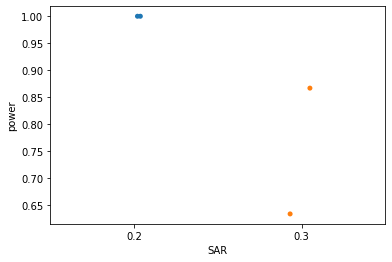

In [138]:
ax = sns.stripplot(y='power', x='SAR', data=df.reset_index())

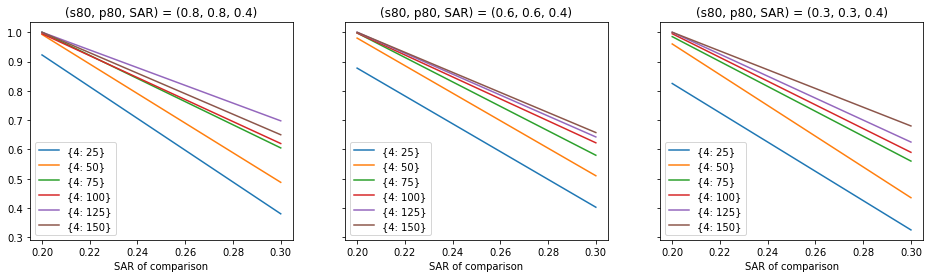

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, len(power_dfs.keys()), figsize=(16,4), sharey=True)
if not isinstance(ax, np.ndarray):
    ax = [ax]
i = 0
for baseline_parameters, powers in power_dfs.items():
    power_df = pd.concat(powers, axis=1)
    power_df.plot(ax=ax[i])
    ax[i].set_xlabel('SAR of comparison')
    ax[i].set_title(f'(s80, p80, SAR) = {baseline_parameters}')

    i += 1
plt.savefig('../batched_figs/power_calculations.png', dpi=300)

In [23]:
for baseline_parameters, powers in power_dfs.items():
    power_df = pd.concat(powers, axis=1)
    break

In [28]:
power_df['{4: 100}']

0.20    1.0000
0.22    0.9925
0.24    0.9900
0.26    0.9425
0.28    0.8350
0.30    0.6075
0.32    0.3825
0.34    0.2150
0.36    0.0600
0.38    0.0225
0.40    0.0000
Name: {4: 100}, dtype: float64

In [64]:
pvalue_df = pd.DataFrame(pvalues_for_increase, index=[float(f'{sar:0.3f}') for sar in sar_range]).transpose()
pvalue_df

,0.20,0.24,0.28,0.32,0.36,0.40
0,0.9999,0.9343,0.9297,0.9129,0.7861,0.1645
1,0.9929,0.9743,0.9952,0.7128,0.9560,0.8315
2,1.0000,0.9951,0.9720,0.9366,0.9434,0.3768
3,0.9999,0.9999,0.9841,0.9106,0.8739,0.2908
4,1.0000,0.9966,0.9728,0.9860,0.4669,0.6460
...,...,...,...,...,...,...
495,0.9999,0.9932,0.9282,0.7555,0.2923,0.7249
496,0.9999,0.9994,0.9263,0.9799,0.4493,0.4249
497,0.9999,0.9989,0.9632,0.9092,0.5181,0.5397
498,1.0000,0.9977,0.8480,0.8308,0.6520,0.7372


In [65]:
power90 = ((pvalue_df > 0.90).sum()/trials)#.plot()
power90.name = 'power p=0.9'

In [66]:
power95 = (pvalue_df > 0.95).sum()/trials
power95.name = 'power p=0.95'

Text(0.5, 0, 'SAR in heightened group')

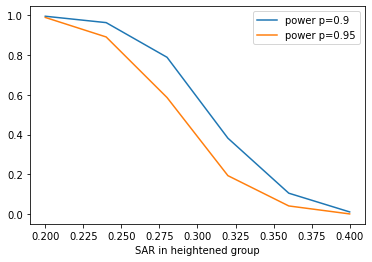

In [67]:
import matplotlib.pyplot as plt
power_df = pd.concat([power90, power95], axis=1)
power_df.plot()
plt.xlabel('SAR in heightened group')

In [ ]:
brendan_fit_df = pd.concat(brendan_fit_dfs)

In [ ]:
clusters = []
for k,g in brendan_fit_df.groupby('parameters'):
    clusters.append(g)

In [ ]:
((clusters[0]['MLE_SAR'] + 0.1) < clusters[1]['MLE_SAR']).value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.close('all')
#%matplotlib agg
min_dict = {0.6: 0.3, 0.4:0.10, 0.5: 0.15, 0.8: 0.5}
max_dict = {0.6: 0.8, 0.4:0.65, 0.5: 0.8, 0.8: 0.8}
colors = ['tab:green', 'tab:orange', 'tab:blue']
axline_colors = ['palegreen', 'bisque', 'lightsteelblue']
xlabels = ['MLE\ns80', 'MLE\np80', 'MLE\nSAR', 'constant traits \nMLE for SAR']
for k,g in brendan_fit_df.groupby(['population mix', 'sample size', 'parameters']):
    plt.figure()
    fig, axes = plt.subplots(1,3, dpi=800, sharey=True)
    print(k)
    print(g.mean())
    population_mix, sample_size, parameters = k
    plt.suptitle(f"{sample_size} individuals equally mixed among size {population_mix} hhs. \ns80, p80, SAR={parameters}")
    i = 0
    for c in g.columns:
        if 'MLE' not in c:
            continue
        if 's80' in c or 'p80' in c:
            parameter_index = 0 if 's80' in c else 1
            mi, ma = 0.1, 0.8
            axes[i].set_ylim(mi, ma)
        if 'SAR' in c:
            pass
            #axes[i].set_ylim(0.1, 0.5)
            axes[i].set_ylim(0.1, 0.8)
        if parameters[i] == 0.8:
            axes[i].axhline(0.795, color=axline_colors[i])
        else:
            axes[i].axhline(parameters[i], color=axline_colors[i])
        sns.violinplot(y=c, data=g, ax=axes[i], orient="v", color=colors[i])
        axes[i].set(xlabel=xlabels[i], ylabel='')
        i += 1

    fig.tight_layout()
    plt.savefig(os.path.join('/Users/thayer/covid_households/batched_figs/brendan', f'{k}' + '.jpg'))
    #break
    #input()

In [ ]:
import numpy as np
expected_s80s = np.linspace(0.1, 0.8, 36)
expected_p80s = np.linspace(0.1, 0.8, 36)
expected_SARs = np.linspace(0.15, 0.40, 26)

decimal_places = 3

for s80, p80, SAR in zip(expected_s80s, expected_p80s, expected_SARs):
    # touch everything in the convex area that we expect to exist
    results.df.loc[float(f"{s80:.{decimal_places}f}"), float(f"{p80:.{decimal_places}f}"), float(f"{SAR:.{decimal_places}f}")]
    #print(results.df.loc[float(f"{s80:.{decimal_places}f}"), float(f"{p80:.{decimal_places}f}"), float(f"{SAR:.{decimal_places}f}")])
    #break